# 💓 Unveiling Patterns in Heart Failure Survival: A Clustering-Based Approach
*Utilizing clustering algorithms to glean insights from survival data.*
### 📊 *By Jasmol Dhesi*  

Welcome to this notebook! Here, we’ll dive into the exciting world of **machine learning** to gather insights onto how survival rates for patients with a history of heart failure may be influenced by a selection of factors. 🩺

This notebook is perfect for anyone curious about how data science can tackle real-world health challenges. We’ll walk you through the process step-by-step, so you’ll not only learn clustering concepts but also pick up some nifty Python tricks along the way! 💡

---

### 🔗 **Link to Dataset**  
[Heart Failure Clinical Records Dataset](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)  

---

Let’s get started! 🚀


## ⚛ Research Question


Can unsupervised learning techniques, such as clustering algorithms (e.g., k-means, hierarchical, and agglomerative clustering), be used to uncover meaningful patterns in heart failure patient survival data by grouping similar features?

## ⚙️ Initial Setup  

In this section, we’ll get everything ready for our analysis. This includes:  
1. **Loading the necessary libraries**: Tools we’ll need throughout the project.  
2. **Mounting Google Drive**: To access the dataset stored in the cloud.  


Before we dive into the analysis, let’s load up the essential libraries. These will provide the tools we need for data manipulation, visualization, and more. Here’s what we’re using and why:  

- **`google.colab.drive`**: To access files stored in Google Drive directly within this notebook.  
- **`pandas`**: For data manipulation and analysis. Think of it as Excel on steroids.  
- **`numpy`**: For numerical operations and efficient handling of arrays.  
- **`matplotlib.pyplot`**: To create visualizations and charts for understanding data trends.  
- **`seaborn`**: A high-level library for creating beautiful, easy-to-read statistical graphics.  

In [63]:
# Import libraries
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

To access the dataset, we’ll mount our Google Drive to this notebook. The data is stored there for convenience, but you can also host it locally if preferred.  

Using Google Colab offers several benefits:  
- **Less computing power needed on your PC**: Perfect for resource-intensive tasks.  
- **Accessibility**: Run your project from anywhere with an internet connection.  

**🔑 Note**: You’ll need to log in to your Google account to authorize access.  

In [64]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 🔍 Exploratory Data Analysis (EDA)

Before diving into any data project, it’s crucial to take a closer look at the data to ensure reliability and usability. Here’s what we’ll focus on in this step:  

1. **Feature Examination**: Understand the different parameters provided and their significance.  
2. **Data Cleaning**: Remove inconsistencies, handle missing values, and refine the dataset.  
3. **Transformations**: Shape the data to better suit our analytical and modeling needs.  
4. **Visualization**: Let the data tell its story through compelling charts and graphs. 📊  

EDA helps us set a solid foundation for meaningful analysis and impactful predictions. Let’s uncover the secrets hidden in the data! 🚀


### 📥 Data Loading
The first step in our analysis is to load the dataset into a pandas DataFrame for easy manipulation and analysis. We’ll use the `read_csv()` function and then inspect the first few rows to ensure everything loaded correctly.  

In [65]:
# load data into pandas dataframe
# will need to change the file path to match yours
# an easy way to get the correct path is to click the file on the sidebar and
#     navigate to your file from which you can right click to copy file path
df = pd.read_csv("/content/drive/MyDrive/DATASCI 207/Final Project/data/heart_failure_clinical_records_dataset.csv")

# check data to ensure correct loading
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### 📄 Interactive Google Sheets  

We’ll export the dataset to Google Sheets, allowing for flexible, real-time exploration directly in a spreadsheet environment.  

In [66]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df)

### 📋 Feature Definitions

Now that the data is loaded, let’s take a closer look at the variables. It’s essential to understand:  
- **What each variable represents**  
- **Its measurement metric**  
- **Its role in the dataset (feature or target)**  

All the variable definitions and additional details are conveniently stored in the `Data Descriptions.xlsx` file. Below, we’ll load and display this file for easy reference:

| **Variable Name**          | **Role**   | **Type**       | **Demographic** | **Description**                                      | **Units**             | **Missing Values** |
|-----------------------------|------------|----------------|------------------|------------------------------------------------------|-----------------------|--------------------|
| `age`                      | Feature    | Integer        | Age              | Age of the patient                                   | Years                | No                |
| `anaemia`                  | Feature    | Binary         |                  | Decrease of red blood cells or hemoglobin           |                     | No                |
| `creatinine_phosphokinase` | Feature    | Integer        |                  | Level of the CPK enzyme in the blood                | mcg/L               | No                |
| `diabetes`                 | Feature    | Binary         |                  | If the patient has diabetes                         |                     | No                |
| `ejection_fraction`        | Feature    | Integer        |                  | Percentage of blood leaving the heart at each contraction | %                 | No                |
| `high_blood_pressure`      | Feature    | Binary         |                  | If the patient has hypertension                     |                     | No                |
| `platelets`                | Feature    | Continuous     |                  | Platelets in the blood                              | Kiloplatelets/mL    | No                |
| `serum_creatinine`         | Feature    | Continuous     |                  | Level of serum creatinine in the blood              | mg/dL              | No                |
| `serum_sodium`             | Feature    | Integer        |                  | Level of serum sodium in the blood                  | mEq/L              | No                |
| `sex`                      | Feature    | Binary         | Sex              | Woman or man                                        |                     | No                |
| `smoking`                  | Feature    | Binary         |                  | If the patient smokes or not                        |                     | No                |
| `time`                     | Feature    | Integer        |                  | Follow-up period                                    | Days               | No                |
| `death_event`              | Target     | Binary         |                  | If the patient died during the follow-up period     |                     | No                |


#### 🎯 Target and Explanatory Variables

The table above shows all of the dataset's variables. Here's a summary of their roles:

1. **Target Variable**  
   - The centerpiece of this study is **`death_event`**, representing patient survival outcomes.  
   - This **binary variable** indicates whether a patient died during the follow-up period:  
     - `1` = Death  
     - `0` = Survival  
   - Predicting this outcome is the **primary objective** of our analysis.

2. **Explanatory Variables**  
   - The remaining variables act as **explanatory inputs** for the predictive model, capturing a wide range of patient characteristics:  

   - **Demographics**:  
     - `age` (Patient's age)  
     - `sex` (Biological sex: man or woman)  

   - **Health Conditions**:  
     - `anaemia` (Decrease in red blood cells or hemoglobin)  
     - `diabetes` (Presence of diabetes)  
     - `high_blood_pressure` (Presence of hypertension)  
     - `smoking` (Smoking status: smoker or non-smoker)  

   - **Biological Measurements**:  
     - `creatinine_phosphokinase` (CPK enzyme level in mcg/L)  
     - `ejection_fraction` (Percentage of blood leaving the heart per contraction)  
     - `platelets` (Platelet count in kiloplatelets/mL)  
     - `serum_creatinine` (Creatinine level in mg/dL)  
     - `serum_sodium` (Sodium level in mEq/L)  

   - **Follow-Up Information**:  
     - `time` (Follow-up period in days)  

Each of these explanatory variables hold the key for predicting patient survival outcome. By incorporating these features into our ML model, we hope to learn more about what influences patient outcomes.

### 🕵 Feature Examination

Understanding the dataset’s features is critical to building a strong analysis. Here’s what we’ll focus on during this step:  

1. **Feature Types**: Identifying categorical, numerical, and other variable types.  
2. **Feature Statistics**: Analyzing the spread and scale of values for each feature.

#### 🆎 Feature Types

Here we check the data types to see if anything needs to be transformed.

In [67]:
# Summary of features
print("Dataset Information:")
df.info()  # Get data types and non-null counts

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 

Great news—our dataset is complete, with no missing values to address. This sets a strong foundation for the next steps in our analysis.  

#### 📰 Feature Statistics

In [68]:
# Summary of numerical features
print("\nSummary Statistics for Numerical Features:")
print(df.describe())


Summary Statistics for Numerical Features:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000

##### 👓 Inisghts from Statistics

1. **Age Distribution**  
   - Patients' ages range from **40 to 95 years**, with an average of **60.83 years**.  
   - Most patients fall within the **51–70 year range** (25th–75th percentiles), representing a middle-aged to elderly demographic.

2. **Anaemia and Diabetes**  
   - **43% of patients** have anaemia (`anaemia` mean = 0.43).  
   - **42% of patients** have diabetes (`diabetes` mean = 0.418).  

3. **Creatinine Phosphokinase (CPK)**  
   - This enzyme level shows significant variation, with a **mean of 581.84 mcg/L** and a standard deviation of **970.29 mcg/L**.  
   - Extreme values (min = 23 mcg/L, max = 7861 mcg/L) suggest the presence of outliers.

4. **Ejection Fraction**  
   - The percentage of blood leaving the heart during contraction ranges from **14% to 80%**, with an average of **38.08%**.  
   - Patients below the 25th percentile (≤30%) may indicate severe heart conditions.

5. **High Blood Pressure**  
   - Around **35% of patients** have high blood pressure (`high_blood_pressure` mean = 0.35).  

6. **Platelets**  
   - Platelet counts vary widely, ranging from **25,100 to 850,000 kiloplatelets/mL**, with an average of **263,358 kiloplatelets/mL**.  
   - The high standard deviation (**97,804**) suggests considerable variability.

7. **Serum Creatinine and Sodium**  
   - Serum creatinine averages **1.39 mg/dL**, with higher values (e.g., max = 9.4 mg/dL) potentially indicating severe kidney dysfunction.  
   - Serum sodium levels range from **113 to 148 mEq/L**, with a normal average of **136.63 mEq/L**.

8. **Sex and Smoking**  
   - **65% of the patients are male** (`sex` mean = 0.65).  
   - **32% of the patients are smokers** (`smoking` mean = 0.32).  

9. **Follow-Up Time**  
   - Patients were followed for **4 to 285 days**, with a median follow-up of **115 days**, providing ample data for survival analysis.

10. **Death Event**  
    - **32% of patients experienced the target event** (`DEATH_EVENT` mean = 0.32), indicating that nearly one-third of the cohort did not survive during the follow-up period.

##### 🧠 Considerations for Modeling

- **Outliers**: Features like `creatinine_phosphokinase` and `serum_creatinine` show significant variability and may require outlier treatment.
- **Binary Variables**: Ensure binary variables like `anaemia`, `sex`, and `smoking` are properly encoded for modeling.
- **Feature Engineering**: Variables like `time` and `ejection_fraction` might benefit from transformations or interaction terms.
- **Imbalanced Target**: The target variable (`DEATH_EVENT`) has a 32:68 ratio, manageable but important to address in the modeling phase.


#### 🔔 Feature Distributions, are we Normal?

By analyzing histograms, we examine the spread of the data to identify skews, patterns, or irregularities. This helps determine whether transformations are needed to improve data distribution and ensure suitability for analysis or modeling.

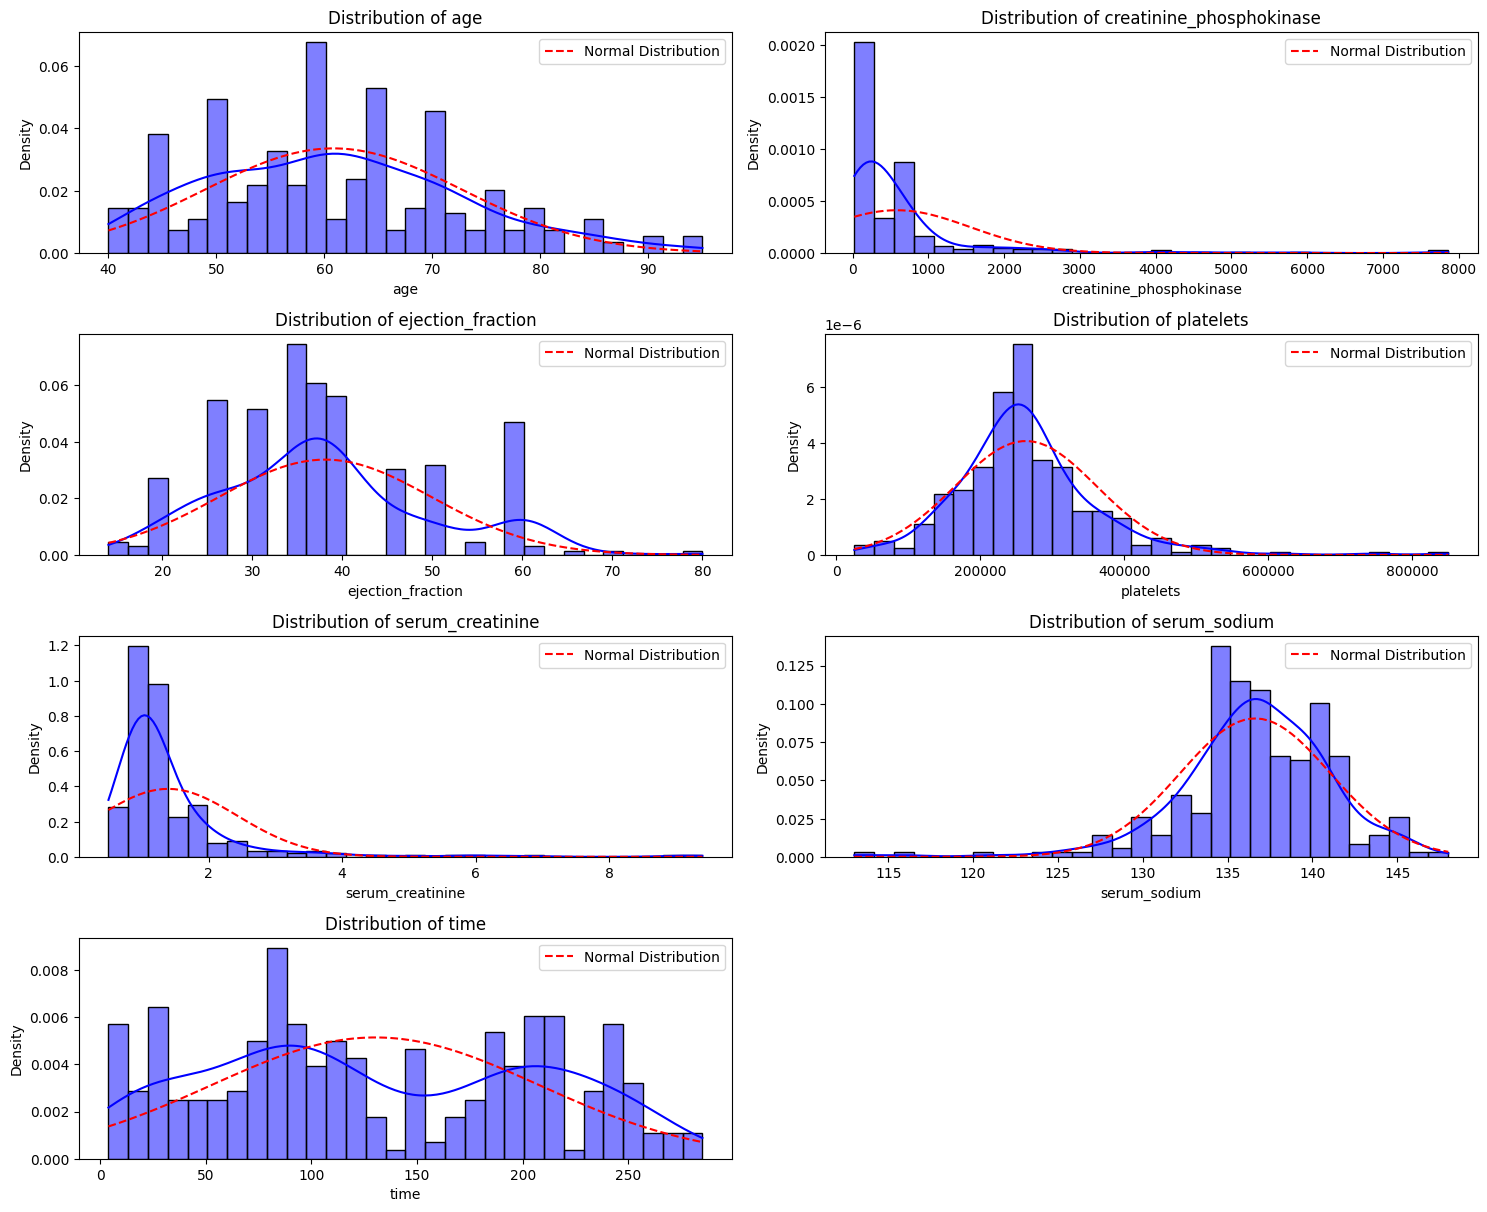

In [69]:
from scipy.stats import norm

original_features = df.select_dtypes(include=['float64', 'int64']).drop(
    ['sex', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT'], axis=1
)

# Create a grid of subplots
num_features = len(original_features)
cols = 2  # Number of columns in the grid
rows = min((num_features + 1) // cols, 15)  # Limit rows to avoid oversized figures
plt.figure(figsize=(15, rows * 3))

# Plot each feature in a subplot
for i, feature in enumerate(original_features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[feature], kde=True, stat="density", color="blue", bins=30)
    x = np.linspace(df[feature].min(), df[feature].max(), 100)
    plt.plot(x, norm.pdf(x, df[feature].mean(), df[feature].std()), color='red', linestyle='--', label='Normal Distribution')
    plt.title(f"Distribution of {feature}")
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### ⭐ Data Transformations

Based on the visual distributions of each feature, here are some transformations we can apply to improve uniformity and handle skewness or scaling issues:

1. **`age`**  
   - **Transformation**: None
   - The distribution is reasonably uniform and interpretable in its raw form.

2. **`creatinine_phosphokinase`**  
   - **Transformation**: Log Transformation
   - This feature is heavily right-skewed. A log transformation will compress the scale and reduce the impact of extreme values.

3. **`ejection_fraction`**  
   - **Transformation**: Standardization
   - Standardize the data to normalize the scale (mean = 0, std = 1).

4. **`platelets`**  
   - **Transformation**: Square Root Transformation
   - The square root helps to reduce mild skewness.

5. **`serum_creatinine`**  
   - **Transformation**: Log Transformation
   - Heavily skewed to the right, a log transformation is appropriate.

6. **`serum_sodium`**  
   - **Transformation**: Standardization  
   - Slightly skewed but near-normal. Standardizing ensures consistent scaling.

7. **`time`**  
   - **Transformation**: Min-Max Scaling
   - Normalize the values between 0 and 1 for consistent interpretation.

In [70]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Apply transformations
df['cpk_log'] = np.log1p(df['creatinine_phosphokinase'])
df['serum_creatinine_log'] = np.log1p(df['serum_creatinine'])

# Standardize ejection_fraction and serum_sodium
scaler = StandardScaler()
df[['ejection_fraction_std'
    ,'serum_sodium_std'
    ,'age_std'
    ,'platelets_std'
    ,'cpk_log_std'    # we standardize cpk to adjust its scale to other values
    ,'sc_log_std'
    ]] = scaler.fit_transform(
    df[['ejection_fraction'
    , 'serum_sodium'
    , 'age'
    , 'platelets'
    , 'cpk_log'
    , 'serum_creatinine_log'
    ]]
)

# Min-max scale time
# using min-max as there aren't many outliers and we want to preserve the range
minmax_scaler = MinMaxScaler()
df['time_scaled'] = minmax_scaler.fit_transform(df[['time']])

# display data
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,DEATH_EVENT,cpk_log,serum_creatinine_log,ejection_fraction_std,serum_sodium_std,age_std,platelets_std,cpk_log_std,sc_log_std,time_scaled
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,...,1,6.368187,1.064711,-1.530560,-1.504036,1.192945,1.681648e-02,0.622916,0.854201,0.000000
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,...,1,8.969796,0.741937,-0.007077,-0.141976,-0.491279,7.535660e-09,2.930118,-0.277325,0.007117
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,...,1,4.990433,0.832909,-1.530560,-1.731046,0.350833,-1.038073e+00,-0.598927,0.041589,0.010676
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,...,1,4.718499,1.064711,-1.530560,0.085034,-0.912335,-5.464741e-01,-0.840088,0.854201,0.010676
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,...,1,5.081404,1.308333,-1.530560,-4.682176,0.350833,6.517986e-01,-0.518250,1.708251,0.014235


We once again examine these features to check for gaussian behavior and compare our results to the original variables.

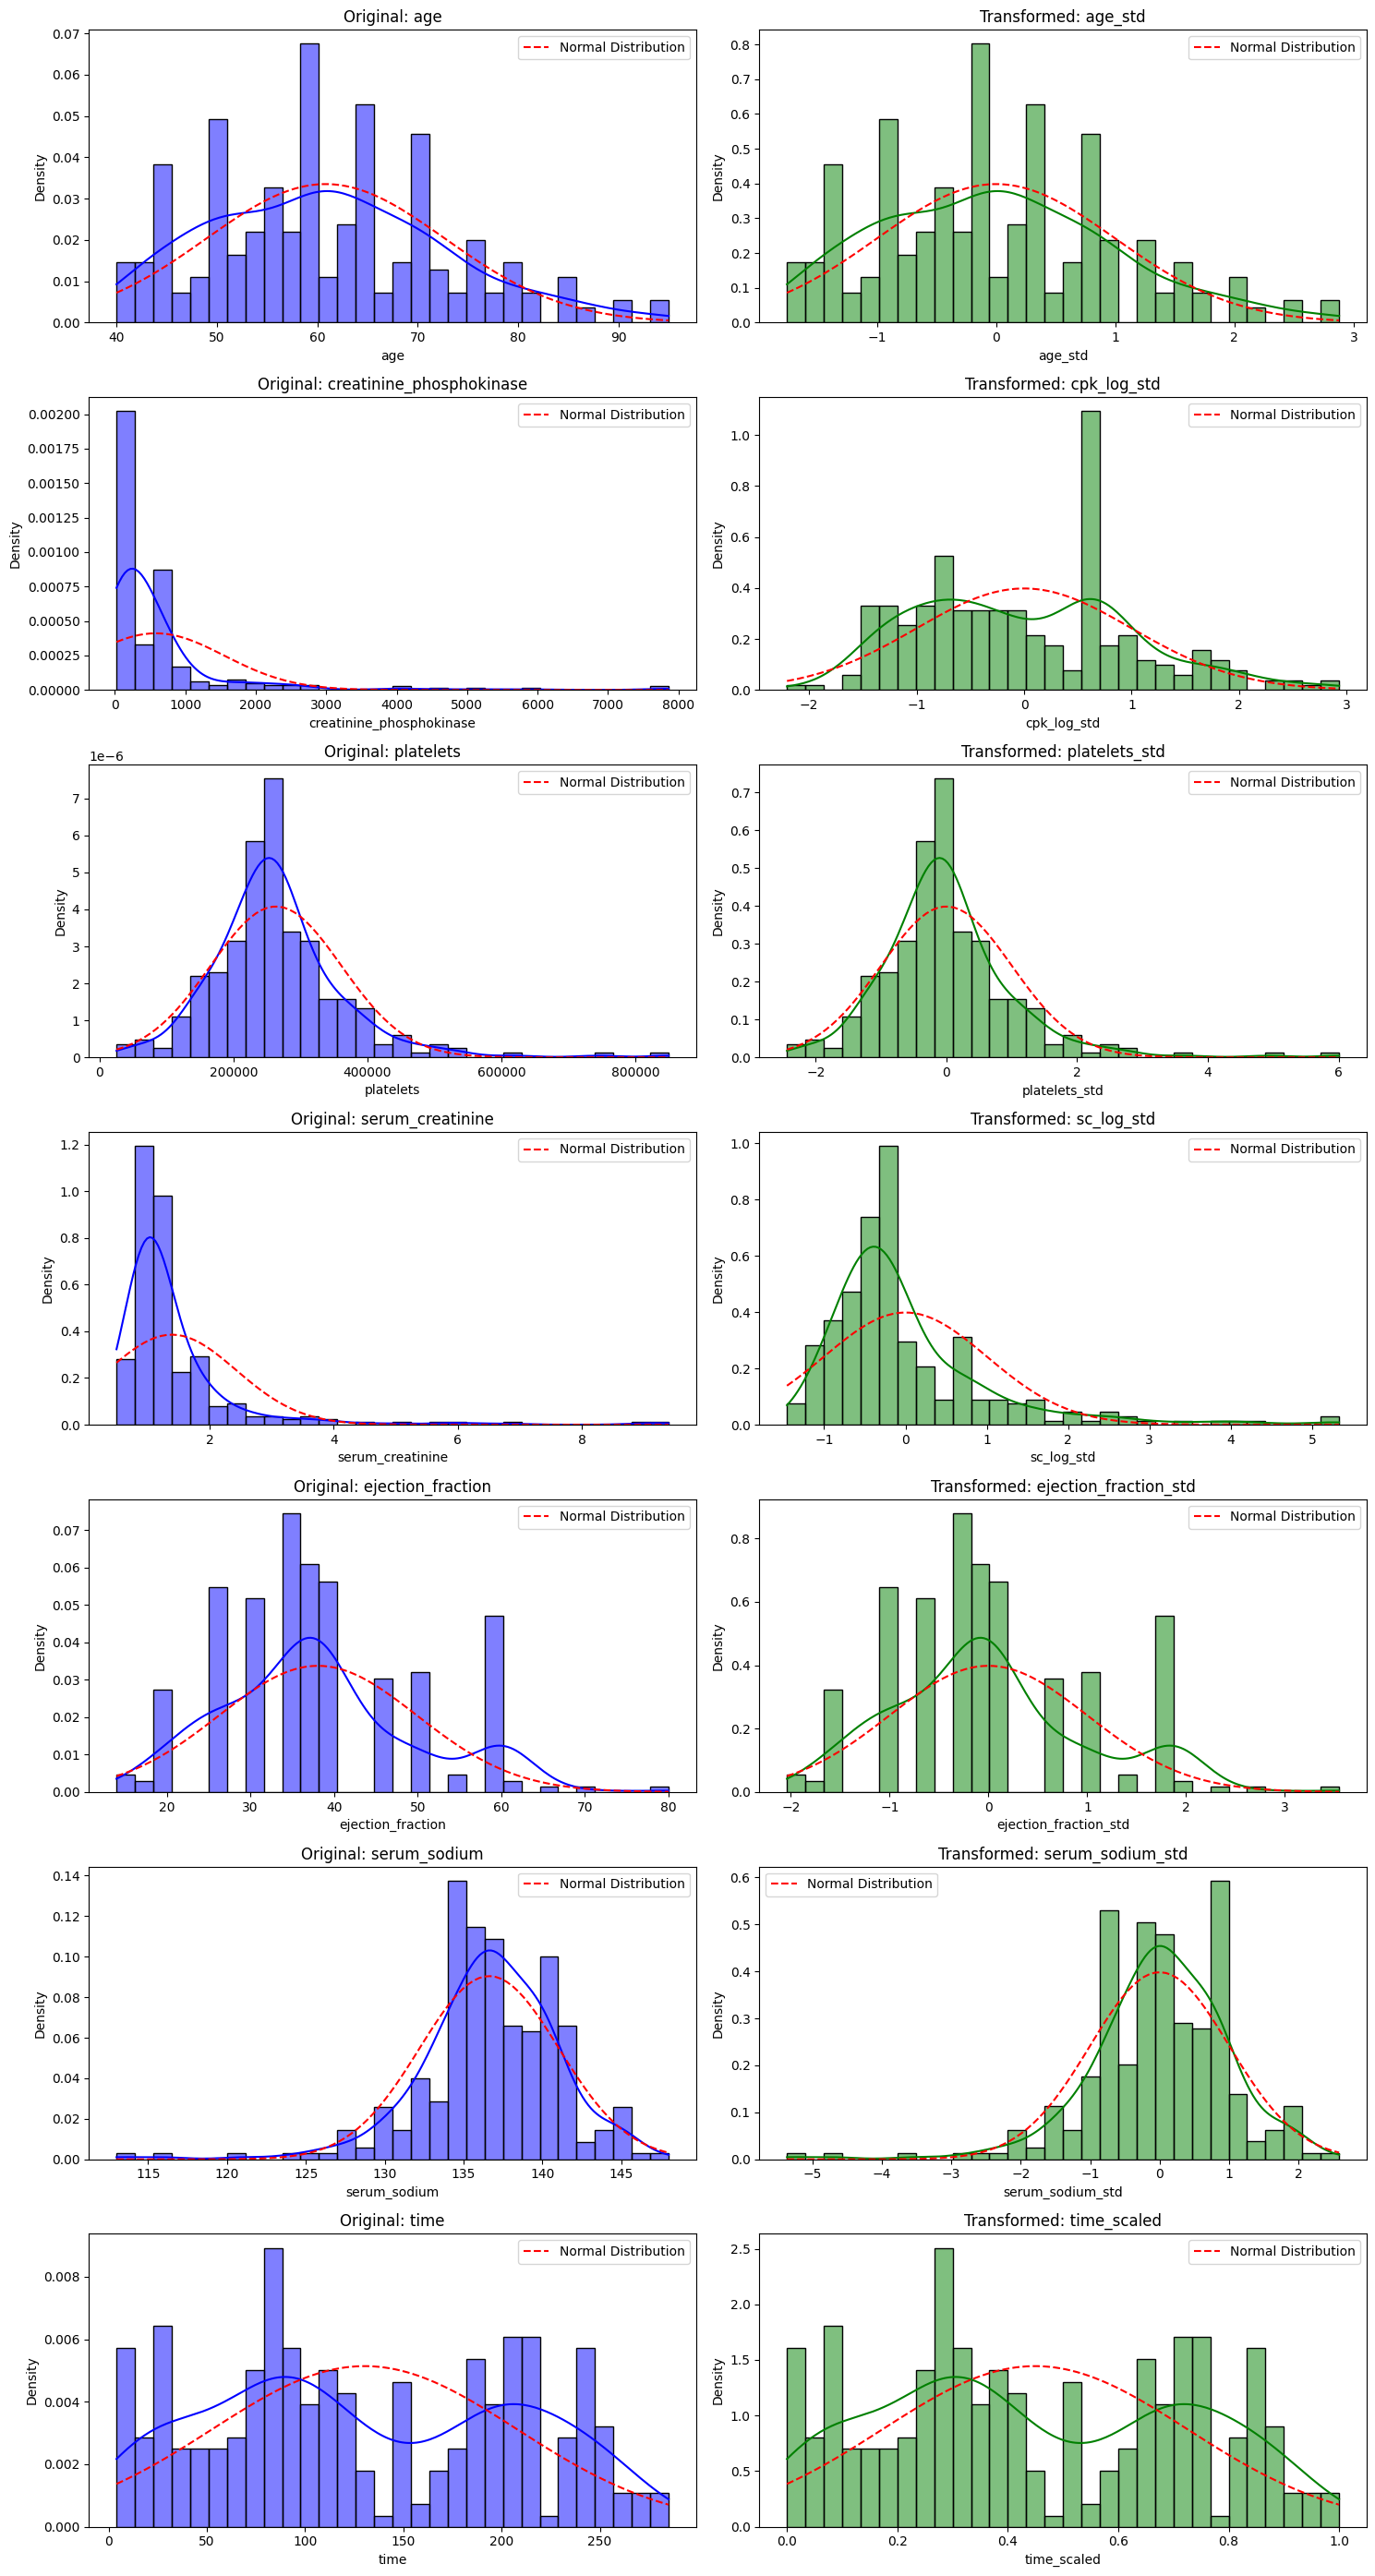

In [71]:
# Features to compare
features = [
    ('age', 'age_std'),
    ('creatinine_phosphokinase', 'cpk_log_std'),
    ('platelets', 'platelets_std'),
    ('serum_creatinine', 'sc_log_std'),
    ('ejection_fraction', 'ejection_fraction_std'),
    ('serum_sodium', 'serum_sodium_std'),
    ('time', 'time_scaled')
]

# Plot original vs. transformed features
plt.figure(figsize=(15, len(features) * 4))
for i, (original, transformed) in enumerate(features, 1):
    # Original feature
    plt.subplot(len(features), 2, 2 * i - 1)
    sns.histplot(df[original], kde=True, stat="density", color="blue", bins=30)
    x = np.linspace(df[original].min(), df[original].max(), 100)
    plt.plot(x, norm.pdf(x, df[original].mean(), df[original].std()), color='red', linestyle='--', label='Normal Distribution')
    plt.title(f"Original: {original}")
    plt.legend()

    # Transformed feature
    plt.subplot(len(features), 2, 2 * i)
    sns.histplot(df[transformed], kde=True, stat="density", color="green", bins=30)
    x = np.linspace(df[transformed].min(), df[transformed].max(), 100)
    plt.plot(x, norm.pdf(x, df[transformed].mean(), df[transformed].std()), color='red', linestyle='--', label='Normal Distribution')
    plt.title(f"Transformed: {transformed}")
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [72]:
# dataframe of all features and target
complete_df = df.select_dtypes(include=['float64', 'int64']).drop(
    ['age', 'creatinine_phosphokinase', 'cpk_log', 'serum_creatinine',
     'serum_creatinine_log', 'platelets', 'time', 'ejection_fraction',
     'serum_sodium'], axis=1
)

# all features no target
all_features = complete_df.drop(['DEATH_EVENT'], axis=1)

# all features no target or binary
numerical_features = all_features.select_dtypes(include=['float64'])

# display dataframe features
complete_df.info()
all_features.info()
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   anaemia                299 non-null    int64  
 1   diabetes               299 non-null    int64  
 2   high_blood_pressure    299 non-null    int64  
 3   sex                    299 non-null    int64  
 4   smoking                299 non-null    int64  
 5   DEATH_EVENT            299 non-null    int64  
 6   ejection_fraction_std  299 non-null    float64
 7   serum_sodium_std       299 non-null    float64
 8   age_std                299 non-null    float64
 9   platelets_std          299 non-null    float64
 10  cpk_log_std            299 non-null    float64
 11  sc_log_std             299 non-null    float64
 12  time_scaled            299 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 30.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0

The plots show histograms of each non-binary feature with a normal distribution curve for comparison. Since the data doesn’t closely match the Gaussian curves, using the Gavish-Donoho method for matrix rank may be challenging. To verify this, we’ll perform a Shapiro-Wilk test to check the normality of each feature.

In [73]:
from scipy.stats import shapiro

# test each feature (original features)
for feature in original_features:
    stat, p = shapiro(df[feature])
    print(f"{feature}: Shapiro-Wilk Test Statistic={stat}, p-value={p}")
    if p > 0.05:
        print(f"{feature} is likely Gaussian.")
    else:
        print(f"{feature} is not Gaussian.")

age: Shapiro-Wilk Test Statistic=0.9754697644007284, p-value=5.34966956855541e-05
age is not Gaussian.
creatinine_phosphokinase: Shapiro-Wilk Test Statistic=0.5142634213017026, p-value=7.050458655796943e-28
creatinine_phosphokinase is not Gaussian.
ejection_fraction: Shapiro-Wilk Test Statistic=0.9473161957501696, p-value=7.215954027787795e-09
ejection_fraction is not Gaussian.
platelets: Shapiro-Wilk Test Statistic=0.9115094173998362, p-value=2.8834509850197122e-12
platelets is not Gaussian.
serum_creatinine: Shapiro-Wilk Test Statistic=0.55146616749074, p-value=5.392796300102366e-27
serum_creatinine is not Gaussian.
serum_sodium: Shapiro-Wilk Test Statistic=0.9390284199982268, p-value=9.214856493071004e-10
serum_sodium is not Gaussian.
time: Shapiro-Wilk Test Statistic=0.9467831472359376, p-value=6.284953847899754e-09
time is not Gaussian.


In [74]:
from scipy.stats import shapiro

# test each feature (transformed features)
for feature in numerical_features:
    stat, p = shapiro(df[feature])
    print(f"{feature}: Shapiro-Wilk Test Statistic={stat}, p-value={p}")
    if p > 0.05:
        print(f"{feature} is likely Gaussian.")
    else:
        print(f"{feature} is not Gaussian.")

ejection_fraction_std: Shapiro-Wilk Test Statistic=0.9473161957501696, p-value=7.215954027787795e-09
ejection_fraction_std is not Gaussian.
serum_sodium_std: Shapiro-Wilk Test Statistic=0.9390284199982268, p-value=9.214856493071004e-10
serum_sodium_std is not Gaussian.
age_std: Shapiro-Wilk Test Statistic=0.9754697644007289, p-value=5.34966956855639e-05
age_std is not Gaussian.
platelets_std: Shapiro-Wilk Test Statistic=0.9115094173998362, p-value=2.8834509850197122e-12
platelets_std is not Gaussian.
cpk_log_std: Shapiro-Wilk Test Statistic=0.9679496194758871, p-value=3.369905149719758e-06
cpk_log_std is not Gaussian.
sc_log_std: Shapiro-Wilk Test Statistic=0.7850009320484501, p-value=1.4990571382851973e-19
sc_log_std is not Gaussian.
time_scaled: Shapiro-Wilk Test Statistic=0.9467831472359376, p-value=6.284953847899754e-09
time_scaled is not Gaussian.


🧪 Shapiro-Wilk Test Results: No Gaussian Structure

The Shapiro-Wilk tests confirm that none of the variables exhibit Gaussian structure, even after applying transformations. This observation has several implications for machine learning modeling:

1. **Algorithms That Assume Normality**  
   - Models like linear regression, logistic regression, or LDA, which assume Gaussian-distributed data or residuals, may perform poorly unless robust techniques or feature engineering are applied.

2. **Non-Parametric and Tree-Based Models**  
   - Algorithms like Random Forests, Gradient Boosting, or Decision Trees are well-suited for this dataset as they do not rely on distributional assumptions.

3. **Impact on Distance-Based Algorithms**  
   - Clustering methods like K-Means or PCA for dimensionality reduction may be affected by skewed or non-Gaussian distributions. Consider preprocessing steps such as scaling or exploring alternative dimensionality reduction techniques like **t-SNE** or **UMAP**.

🛠 Key Takeaway
As we're working with clustering techniques, we may need preprocess these features for optimal performance. We'll refine these parametes when building our model.

Now we'll further refine our data by indentifaying outliers.

#### 🤥 Outliers

Outliers are like the odd ducks of your dataset—they don’t fit in with the rest of the flock. While they may seem like pesky anomalies, spotting and handling them is **critical** for several reasons:

1. **Protecting Model Performance** 🚀  
   - Outliers can distort your machine learning models, especially for algorithms like linear regression, which are sensitive to extreme values. Identifying and addressing them ensures your models aren’t overly influenced by these unusual data points.

2. **Uncovering Hidden Insights** 🔍  
   - Outliers often tell a story. In medical data, an outlier could represent a rare condition; in financial data, it might signal fraud. These unusual values could hold key insights worth exploring.

3. **Improving Data Quality** 🛠  
   - Some outliers result from errors (e.g., incorrect data entry, sensor malfunctions). Detecting them helps clean your data, making it more reliable for analysis and modeling.

4. **Enhancing Model Interpretability** 📊  
   - Outliers can skew the results of algorithms that rely on averages or distances, making it harder to interpret your models. Removing or handling them can improve clarity.

5. **Tailoring Preprocessing Techniques** 🎨  
   - Knowing where outliers exist allows you to choose the right transformations (e.g., log or scaling) or decide whether to remove, cap, or keep them.

Outliers are detected using a combination of **visual** and **statistical** methods:  

1. **Boxplots**:  
   Boxplots offer a visual representation of outliers by highlighting data points that fall outside the interquartile range (IQR). This helps quickly spot extreme values in the dataset.  

2. **Z-Scores**:  
   Z-scores quantitatively measure how far each data point deviates from the mean in terms of standard deviations. We've selected three standard deviations as it accounts for more than 99% of normally distributed data ans is sufficient for our purposes. Data points with a Z-score greater than 3 or less than -3 are flagged as potential outliers. This method is particularly useful for numerical data that follows a roughly normal distribution.  

These approaches give us a quick visual summary for each feature and a statistical evaluation of the data.

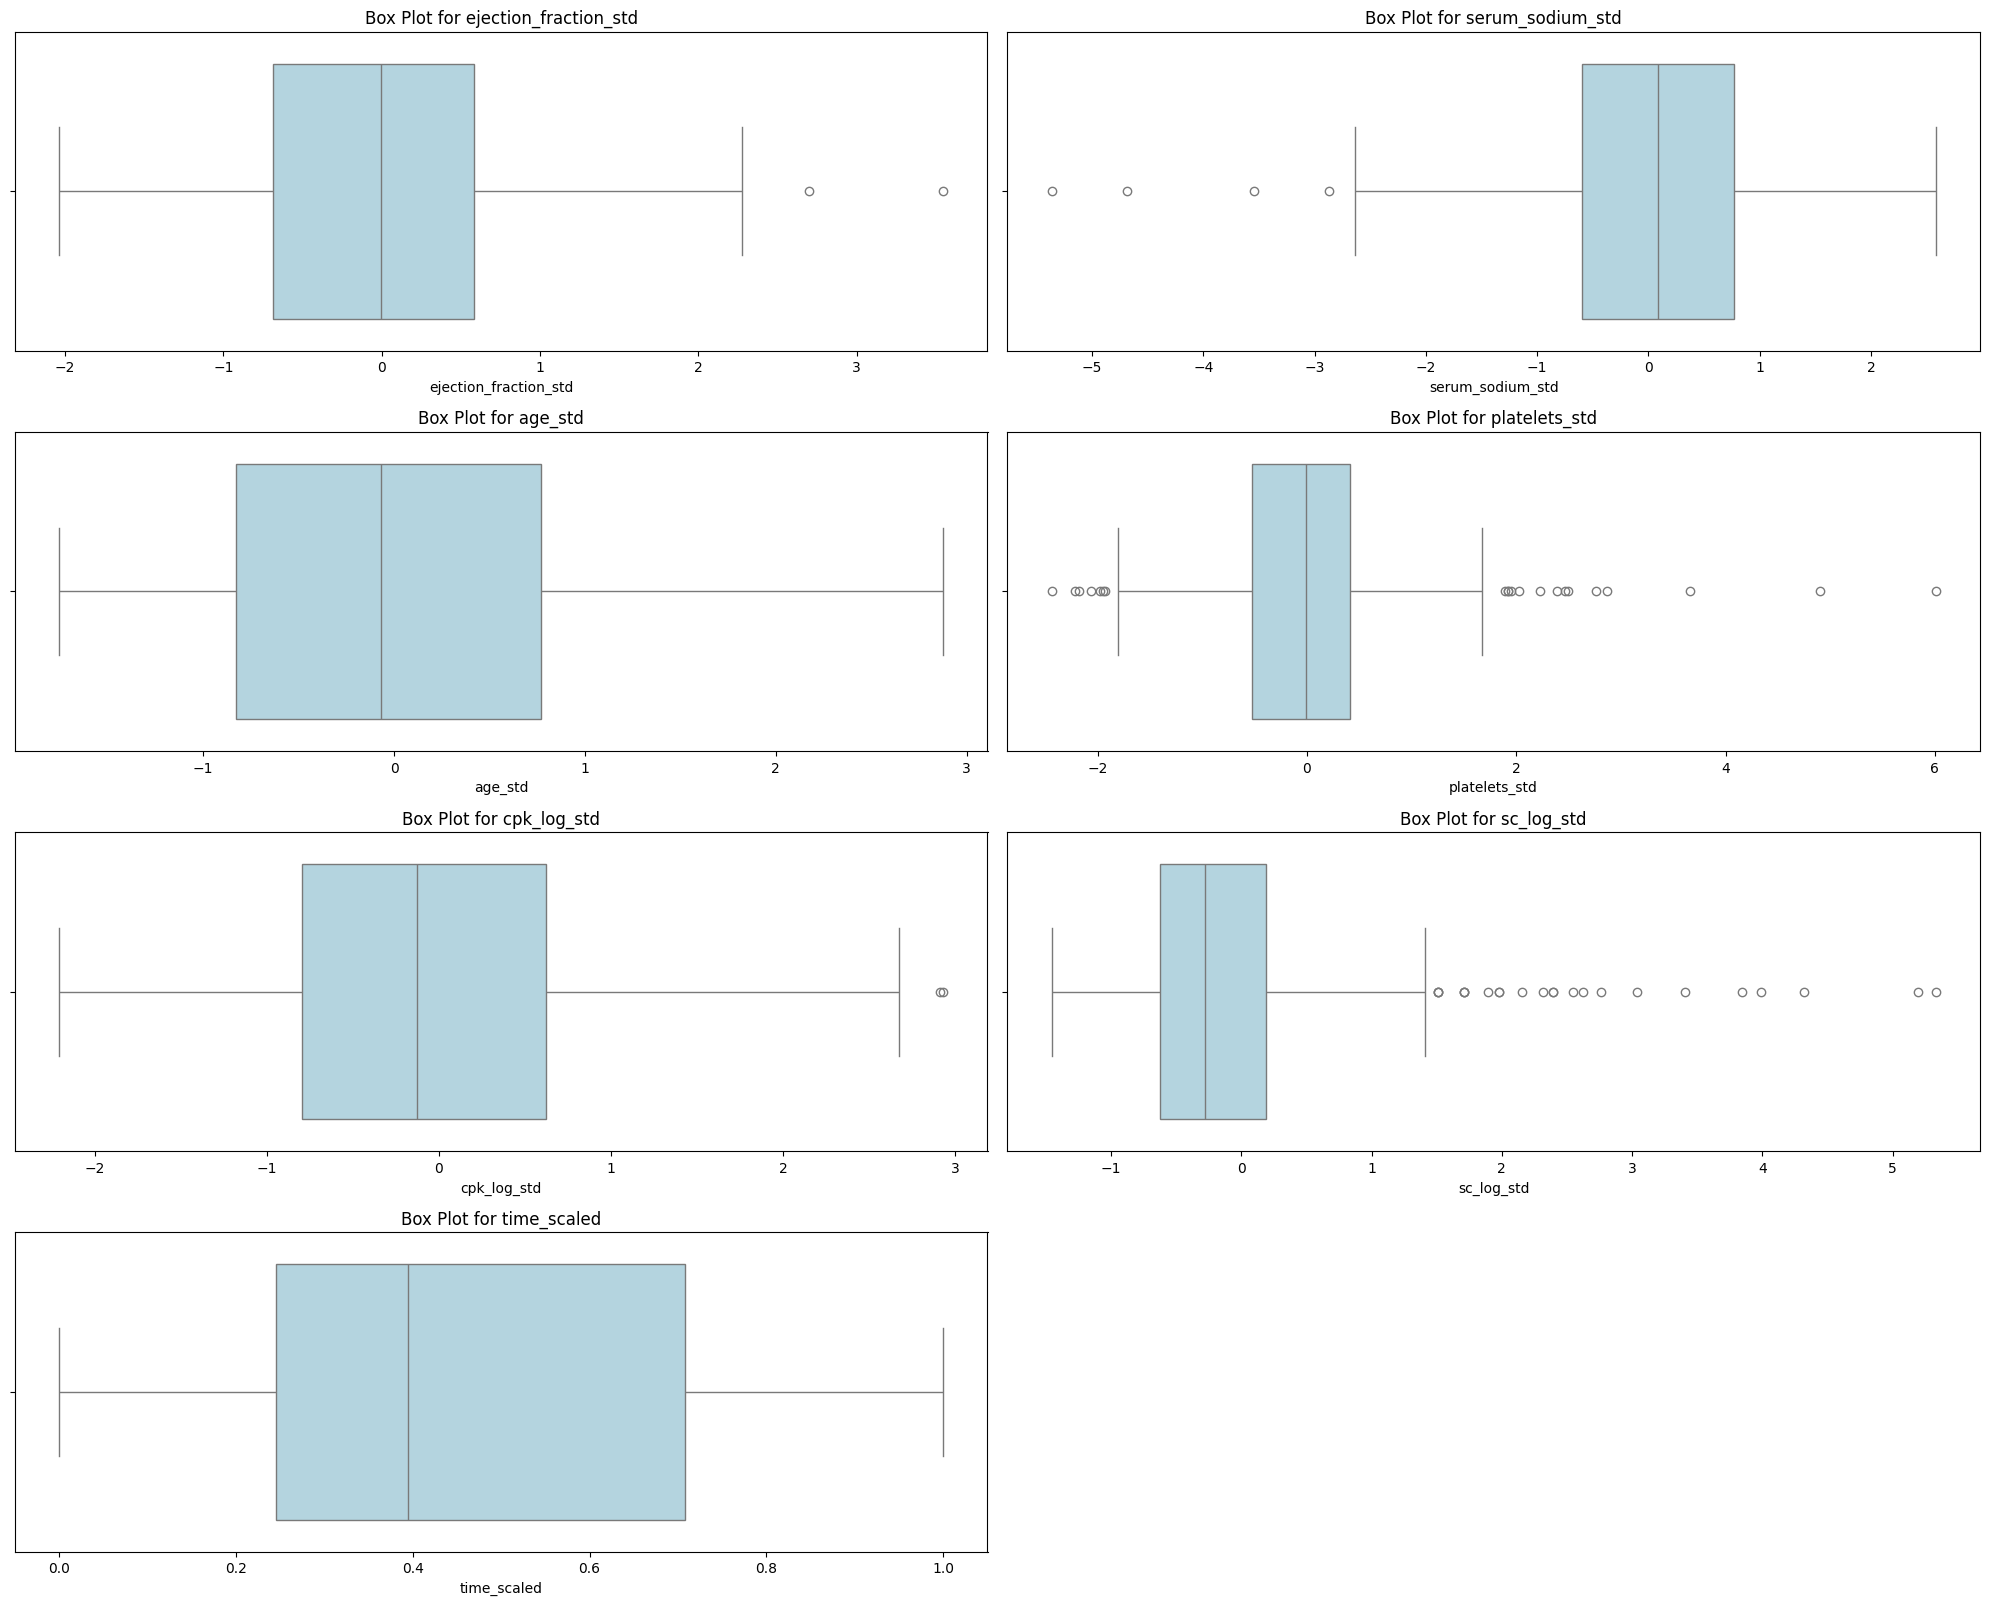

In [75]:
# boxplot of all non binary features to identify outliers
# Define the number of columns
cols = 2  # Number of columns in the grid, minimum 2
rows = (len(numerical_features) + cols - 1) // cols  # Calculate the number of rows needed

# Set up the figure size
plt.figure(figsize=(20, rows * 4))

# Iterate through each numerical feature and plot in a grid layout
for i, col in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Box Plot for {col}")
    plt.xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

The box plots show the presence of many outliers, though, their amount vary across each feature. We see variables like `ejection_fraction` having only a few outliers whereas `serum_creatine` has many outlier present.

We now look through the entire dataset of standardized continuous numerical features for entries with outliers in any of its features via z-score. We use the transformed the data rather than original data as original data is not scaled appropriately and because we will be using the transformed data for our model.

In [76]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = numerical_features.apply(zscore)

# Identify outliers that are beyond three standard deviations
outliers = (z_scores.abs() > 3).any(axis=1)
print("Number of outliers detected:", outliers.sum())

# display outliers in master dataframe
df[outliers]


Number of outliers detected: 14


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,DEATH_EVENT,cpk_log,serum_creatinine_log,ejection_fraction_std,serum_sodium_std,age_std,platelets_std,cpk_log_std,sc_log_std,time_scaled
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,...,1,5.081404,1.308333,-1.530560,-4.682176,0.350833,6.517986e-01,-0.518250,1.708251,0.014235
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,...,1,4.820282,2.341806,-0.260991,-0.823006,1.614001,1.276539e+00,-0.749824,5.331230,0.021352
19,48.0,1,582,1,55,0,87000.00,1.90,121,0,...,1,6.368187,1.064711,1.431768,-3.547126,-1.080758,-1.806197e+00,0.622916,0.854201,0.039146
28,58.0,1,60,0,38,0,153000.00,5.80,134,1,...,1,4.110874,1.916923,-0.007077,-0.595996,-0.238646,-1.130248e+00,-1.378952,3.841745,0.078292
48,80.0,1,553,0,20,1,140000.00,4.40,133,1,...,1,6.317165,1.686399,-1.530560,-0.823006,1.614001,-1.263389e+00,0.577667,3.033613,0.131673
52,60.0,0,3964,1,62,0,263358.03,6.80,146,0,...,1,8.285261,2.054124,2.024234,2.128124,-0.070223,7.535660e-09,2.323047,4.322722,0.138790
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,...,0,6.368187,0.779325,3.547716,0.085034,-1.333392,7.535660e-09,0.622916,-0.146258,0.209964
105,72.0,1,328,0,30,1,621000.00,1.70,138,0,...,1,5.796058,0.993252,-0.684180,0.312044,0.940312,3.662843e+00,0.115530,0.603692,0.298932
109,45.0,0,292,1,35,0,850000.00,1.30,142,1,...,0,5.680173,0.832909,-0.260991,1.220084,-1.333392,6.008180e+00,0.012759,0.041589,0.298932
131,60.0,1,1082,1,45,0,250000.00,6.10,131,1,...,0,6.987490,1.960095,0.585389,-1.277026,-0.070223,-1.368082e-01,1.172136,3.993091,0.366548


##### 🤔 To Keep or Not to Keep the Outliers?  

Now that we’ve identified the outliers, the big question looms: **what should we do with them?**  

- **Keeping the Outliers**: Preserves edge cases and rare occurrences that might be critical.  
- **Removing the Outliers**: Cleans the dataset and can improve model performance, especially for sensitive algorithms.  

These outliers were identified based on any single feature exceeding three standard deviations. Since we’re applying clustering algorithms to the data and these outliers could influence the final model in unexpected ways, we decide to **remove these outliers** from our data.|

##### ➖ Removing the Outliers

In [77]:
# removing the outliers from dataframe with transformed values
nf_clean = numerical_features[~outliers]
complete_clean = complete_df[~outliers]
all_clean = all_features[~outliers]

# making adjusted data frame with all values
df_clean = df[~outliers]

# verify removal of outleirs
print(f"Number of clean rows: {nf_clean.shape[0]}")

Number of clean rows: 285


Now we move forward by analyzing the dataset features to narrow down the ones we'll use in our model! 🚀

#### 💍 Feature Relationships

Correlation Matrix: Quantifies the relationship between numerical features.

Here we exclude the target variable as we don't want to introduce any bias into the model from what we believe will affect the model.

Including the target may unnecessarily influence unsupervised tasks or highlight relationships that are irrelevant to the clustering or dimensionality reduction process.

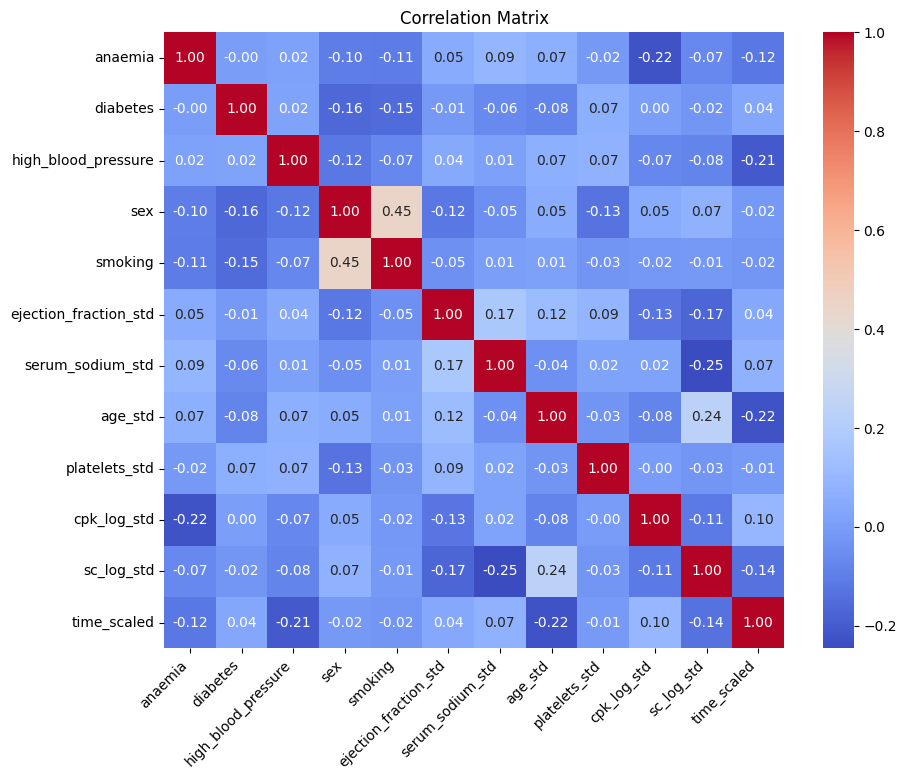

In [78]:
# Correlation matrix for numerical features
# use
correlation_matrix = all_clean.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.xticks(rotation=45, ha='right')    # tilt the x-axis labels for legibility
plt.title("Correlation Matrix")
plt.show()

Most features have very low correlations with each other, which is a good sign! This means the variables are not redundant and likely capture unique information.

The only noticeable correlation is between **`sex`** and **`smoking`**, with a moderate correlation of **0.45**. This suggests they share some overlap, but it’s not strong enough to be a major concern. We'll be keeping both features as they both present clinical relevance.

Overall, the low correlations indicate that these features provide diverse inputs for clustering.

In moving forward with modelling **we'll be using all features EXCEPT platelets**. Research has not been able to establish a clear link between platelets and heart failure and mortality rates.

[Platelets and Heart Failure](https://academic.oup.com/eurheartj/article/27/22/2623/2887328)

In [79]:
# removing the platelets from features
nf_clean = nf_clean.drop(["platelets_std"], axis = 1)
complete_clean = complete_df.drop(["platelets_std"], axis = 1)
all_clean = all_features.drop(["platelets_std"], axis = 1)

## Modelling

### Data Preprocessing

Unlike supervised learning algorithms, unsupervised learning algorithms **don't need the data to be split into test, train, and validation datasets**. K-Means identifies clusters by grouping data points based on feature similarity.
Since it does not use labels (like death_event), there is no need to reserve part of the dataset for validation, as in supervised learning.

For the same reason, there is no need to shuffle the datasets indices, the algorithm takes in the dataset as a whole to examine relationships.

### K-Means

For our model we will be using two clusters to distinguish the binary outcomes we’re targeting: survival ('no death') and fatality ('death').

We source the k-means algorithm from the sci-kit learn library.

In [80]:
from sklearn.cluster import KMeans

# set params
n_clusters = 2    # using two clusters as there are only two death outcomes
random_state = 10  # makes sure you get the same results each time

# make np array of the feature values
X = np.array(all_clean.values)

# define KMeans model
# can optionally use fit_predict(); better when not using a test dataset
def fit_kmeans(X, n_clusters, random_state):
  model = KMeans(n_clusters=n_clusters, random_state=random_state)
  model.fit(X)
  return model

# fit KMeans model
kmeans_model = fit_kmeans(X, n_clusters, random_state)

# get cluster predictions
predictions = kmeans_model.predict(X)

# add predictions to data
complete_clean['Cluster'] = predictions

After running the algorithm, we examine the clusters to determine how the data was distributed across the different clusters.

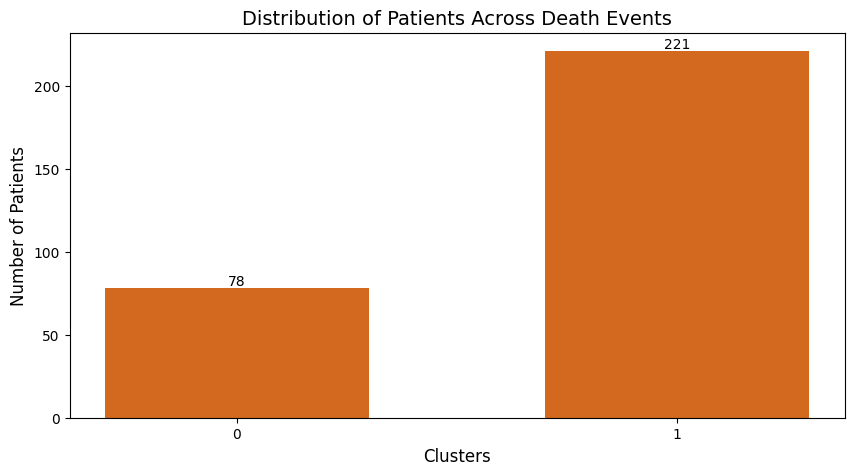

Cluster
0     78
1    221
Name: count, dtype: int64


In [81]:
# Distribution of clusters
cluster_counts = complete_clean['Cluster'].value_counts().sort_index()

# Histogram of the cluster distribution
plt.figure(figsize=(10, 5))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='chocolate', width=0.6)

# Set plot labels and title
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title('Distribution of Patients Across Death Events', fontsize=14)

# Ensure the number of bins is set to 10
plt.xticks(range(n_clusters))  # Ensure all cluster labels

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height,  # Y position
        f'{height}',  # Text (height value)
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10  # Font size for readability
    )

# Display the histogram
plt.show()

# Verify with value_counts
print(cluster_counts)

Given the data, we now compare it to our actual data labels to determine whether the clustering helps predict death.

In [82]:
# Create a DataFrame to compare clusters with death_event
comparison_df = pd.DataFrame({
    'Cluster': predictions,
    'Death_Event': complete_clean['DEATH_EVENT']  # Replace with your target column
})

# Analyze cluster composition
print(comparison_df.groupby(['Cluster', 'Death_Event']).size())

Cluster  Death_Event
0        0               28
         1               50
1        0              175
         1               46
dtype: int64


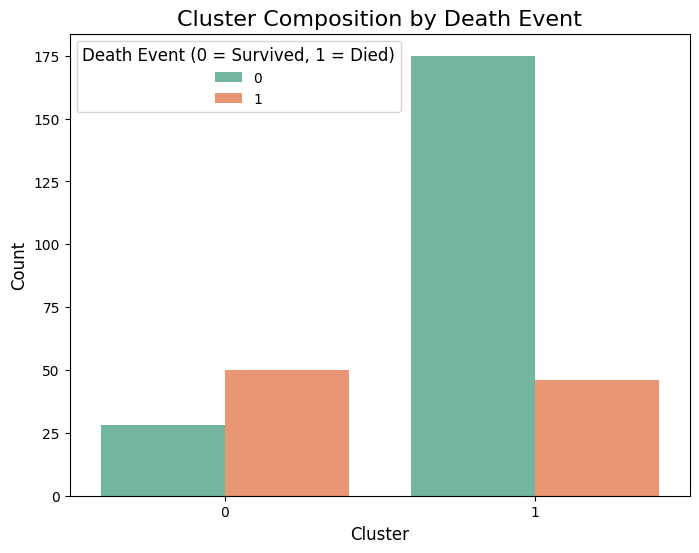

In [83]:
# Group by cluster and death_event to get counts
cluster_composition = comparison_df.groupby(['Cluster', 'Death_Event']).size().reset_index(name='Count')

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=cluster_composition,
    x='Cluster',
    y='Count',
    hue='Death_Event',
    palette='Set2'
)

# Add labels and title
plt.title("Cluster Composition by Death Event", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Death Event (0 = Survived, 1 = Died)", fontsize=10, title_fontsize=12)
# plt.grid(axis='y', alpha=0.3)
plt.show()

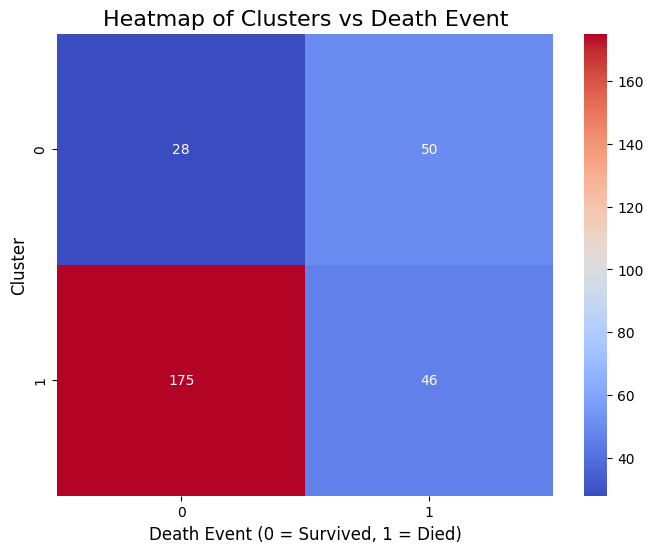

In [84]:
# Pivot the data for a heatmap
heatmap_data = cluster_composition.pivot(index='Cluster', columns='Death_Event', values='Count').fillna(0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='coolwarm', cbar=True)

# Add labels and title
plt.title("Heatmap of Clusters vs Death Event", fontsize=16)
plt.xlabel("Death Event (0 = Survived, 1 = Died)", fontsize=12)
plt.ylabel("Cluster", fontsize=12)
plt.show()


Our model has assigned approximately one-quarter of the data to Cluster 0 and the remainder to Cluster 1.

Due to the nature of clustering, we cannot make assumptions of what the clusters represent as they are simply groups of similar features by distance.


#### Model Evaluation

##### Silhouette Score

To determine our model's performance, we'll use the silhouette score to measure how well each data point fits within its cluster compared to other clusters. It ranges from -1 to 1:
- 1:  Perfect clustering; the data point is well-matched to its own cluster and far from others.
- 0: Overlapping clusters; the data point lies equally between its own cluster and others.
- Negative Values: Poor clustering; the data point is closer to another cluster than its own.

In [85]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
score = silhouette_score(X, predictions)
print(f"Silhouette Score for k=2: {score}")

Silhouette Score for k=2: 0.18660896083303685


k=2, Silhouette Score: 0.18660896083303685
k=3, Silhouette Score: 0.18660896083303685
k=4, Silhouette Score: 0.18660896083303685
k=5, Silhouette Score: 0.18660896083303685
k=6, Silhouette Score: 0.18660896083303685
k=7, Silhouette Score: 0.18660896083303685
k=8, Silhouette Score: 0.18660896083303685
k=9, Silhouette Score: 0.18660896083303685
k=10, Silhouette Score: 0.18660896083303685


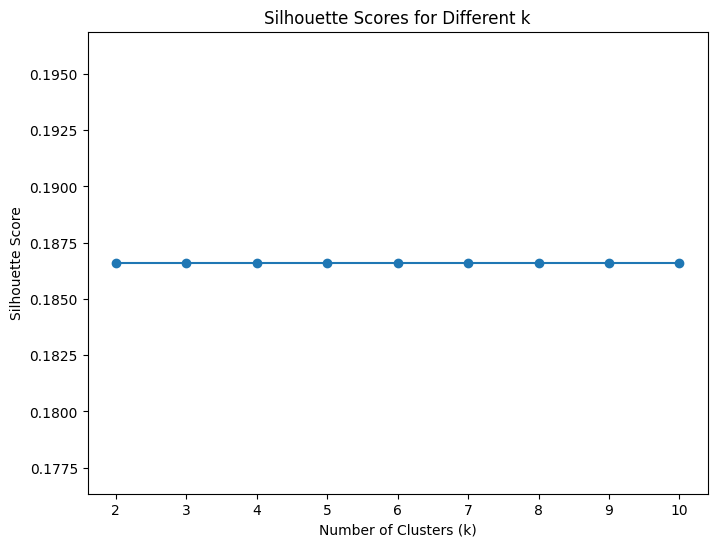

In [86]:
# Test silhouette scores for a range of cluster numbers
scores = []
k_values = range(2, 11)  # Testing k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)
    score = silhouette_score(X, predictions)
    scores.append(score)
    print(f"k={k}, Silhouette Score: {score}")

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, scores, marker='o')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


For the k-means we find the cluster of two to be the most optimal k value. However, the sihouette score plot staying constant is concerning, indicating a lack of well-separated clusters in the model.

To ameliorate this issue, we’ll try reducing the dimensionality of the features to simplify our model using **Single Value Decomposition (SVD)**

### 🥀 Single Value Decomposition

**Singular Value Decomposition (SVD)** is a mathematical technique used to decompose a matrix into three component matrices:  
1. **U (Left Singular Vectors)**: Represents relationships between rows.
2. **Σ (Singular Values)**: Diagonal matrix containing the importance (or weight) of each component.
3. **Vᵀ (Right Singular Vectors)**: Represents relationships between columns.

**Why Use SVD?**
- **Dimensionality Reduction**: Reduces the number of features while preserving as much information as possible.
- **Feature Selection**: Helps remove noise and redundancy from the dataset, leading to more efficient and interpretable models.
- **Clustering Readiness**: By reducing the dataset to its most significant components, clustering algorithms can perform better and faster.

#### ✂ Truncated Matrix Rank Determination



**Why is the Rank Important?**
1. **Model Complexity**:  
   - The rank determines how many dimensions are retained in the truncated matrix.  
   - A higher rank captures more detail but may overfit the noise. A lower rank simplifies the model but risks losing meaningful information.  

2. **Accuracy vs. Efficiency**:  
   - An optimal rank ensures that the model balances complexity and computational efficiency.  
   - It helps avoid redundant or noisy components that could hinder model performance.

**What is the Method?**

To determine the optimal rank of our truncated matrix, we’ll visualize the **singular values** using a **logarithmic plot**. This approach helps us identify the most significant components while filtering out noise.

**What Are Singular Values?**
- Singular values represent the importance or weight of each component in explaining the variability in the data.
- A sharp drop in singular values indicates that the remaining components contribute little meaningful information, often corresponding to noise.

**How to Interpret the Log Plot**:
1. **Look for the "Elbow"**:  
   - The **elbow point** is where the plot transitions from a steep decline to a flatter slope.
   - This indicates the point where most of the significant variability in the data is captured, and the remaining singular values primarily represent noise.

2. **Select Components**:  
   - Retain components corresponding to singular values before the elbow point. These components capture the essential structure of the data.

**Why This Matters**:
- By identifying the optimal number of components, we balance:
  - **Complexity**: Avoiding overfitting by discarding noisy or redundant components.
  - **Efficiency**: Reducing computational overhead by retaining only the meaningful dimensions.

Let’s plot the singular values and look for the elbow point to guide our rank selection!

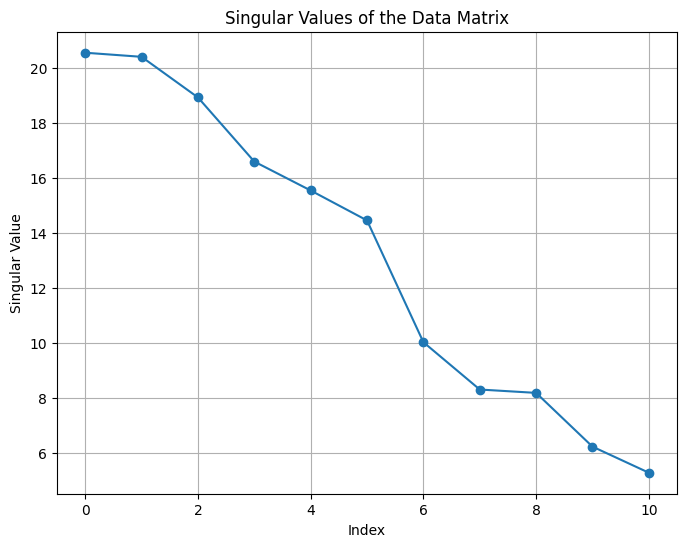

In [87]:
from scipy.linalg import svd

# Perform SVD on all feature data
U, singular_values, Vt = svd(all_clean.values, full_matrices=False)

# Plot singular values
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(singular_values, marker='o')
plt.title('Singular Values of the Data Matrix')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid()
plt.show()

In our plot, we see a sizeable drop in singular values around index 5 and  6, meaning the matrix rank is approximately 5–6.

We go ahead and use a rank of **5** for the SVD.

In [88]:
from sklearn.decomposition import TruncatedSVD

# matrix rank
components = 5

# Apply SVD
svd = TruncatedSVD(n_components=components, random_state=42)  # Choose number of components (e.g., 2 for visualization)
reduced_data = svd.fit_transform(all_clean)

# Display results
print("Explained Variance Ratio:", svd.explained_variance_ratio_)
print("Reduced Data Shape:", reduced_data.shape)

# Convert to DataFrame for clustering
reduced_df = pd.DataFrame(reduced_data, columns=[f"Component {i+1}" for i in range(components)])
print(reduced_df.head())

Explained Variance Ratio: [0.1826598  0.07644973 0.19212796 0.14676633 0.12840295]
Reduced Data Shape: (299, 5)
   Component 1  Component 2  Component 3  Component 4  Component 5
0     2.384936    -0.229873    -1.061789     0.764219    -0.594978
1    -0.500056     0.793191    -1.864004     2.142011     0.620555
2     2.011442     0.131855    -1.031847    -0.801355    -0.471775
3     1.205319     0.623374    -0.767549    -1.223597    -0.683511
4     4.214808    -1.397963    -1.794919    -1.130974     1.487053


In [89]:
# Get the components (loadings)
components = svd.components_

# Create a DataFrame for better readability
loadings = pd.DataFrame(components, columns=all_clean.columns,
                        index=[f"Component {i+1}" for i in range(components.shape[0])])
print(loadings)

              anaemia  diabetes  high_blood_pressure       sex   smoking  \
Component 1  0.207932  0.164949             0.146306  0.321693  0.159787   
Component 2  0.329384  0.326282             0.270679  0.519253  0.287281   
Component 3  0.111705 -0.042549             0.064251 -0.030277 -0.008026   
Component 4 -0.043228  0.009241             0.023542  0.093789  0.028827   
Component 5  0.009262  0.136747            -0.000308 -0.006279 -0.016894   

             ejection_fraction_std  serum_sodium_std   age_std  cpk_log_std  \
Component 1              -0.275895         -0.486513  0.358014    -0.194329   
Component 2               0.065994          0.271207 -0.198453     0.039574   
Component 3               0.606162          0.318099  0.485014    -0.521296   
Component 4               0.205221          0.176365  0.485995     0.805512   
Component 5               0.705089         -0.492786 -0.421734     0.139248   

             sc_log_std  time_scaled  
Component 1    0.534874     0

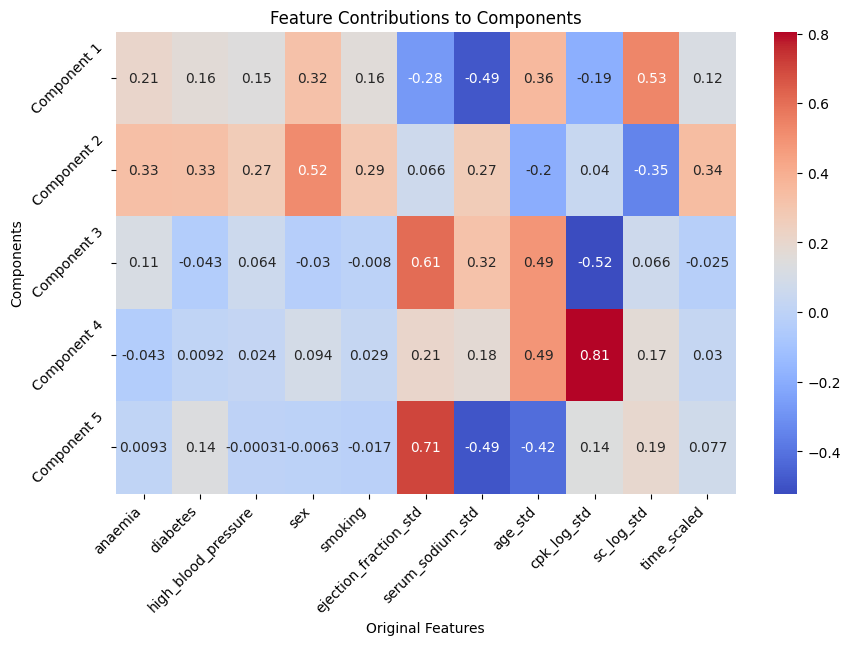

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap="coolwarm", cbar=True)
plt.title("Feature Contributions to Components")
plt.xlabel("Original Features")
plt.ylabel("Components")
plt.xticks(rotation=45, ha='right')    # tilt the x-axis labels for legibility
plt.yticks(rotation=45, ha='right')    # tilt the y-axis labels for legibility
plt.show()


With the dimensionality reduced, we can now apply k-means clustering to the transformed dataset to evaluate its impact on the silhouette score and assess whether this approach improved clustering performance.

#### K-Means Implementation

In [101]:
# set params
n_clusters = 2    # using two clusters as there are only two death outcomes
random_state = 13  # makes sure you get the same results each time

# make np array of the feature values
X = np.array(reduced_df.values)

# define KMeans model
# can optionally use fit_predict(); better when not using a test dataset
def fit_kmeans(X, n_clusters, random_state):
  model = KMeans(n_clusters=n_clusters, n_init=20, random_state=random_state)
  model.fit(X)
  return model

# fit KMeans model
kmeans_model = fit_kmeans(X, n_clusters, random_state)

# get cluster predictions
predictions = kmeans_model.predict(X)

# add predictions to data
complete_clean['Cluster_SVD'] = predictions

After running the algorithm, we examine the clusters to determine how the data was distributed across the different clusters.

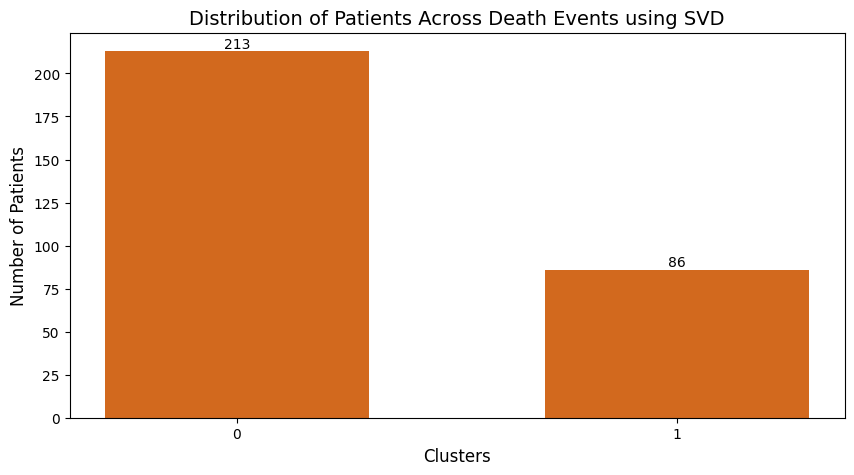

Cluster_SVD
0    213
1     86
Name: count, dtype: int64


In [102]:
# Distribution of clusters
cluster_counts = complete_clean['Cluster_SVD'].value_counts().sort_index()

# Histogram of the cluster distribution
plt.figure(figsize=(10, 5))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='chocolate', width=0.6)

# Set plot labels and title
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title('Distribution of Patients Across Death Events using SVD', fontsize=14)

# Ensure the number of bins is set to 10
plt.xticks(range(n_clusters))  # Ensure all cluster labels

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height,  # Y position
        f'{height}',  # Text (height value)
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10  # Font size for readability
    )

# Display the histogram
plt.show()

# Verify with value_counts
print(cluster_counts)

In [103]:
# Calculate silhouette score
score = silhouette_score(X, predictions)
print(f"Silhouette Score for k=2: {score}")

Silhouette Score for k=2: 0.2254492571029555


In [105]:
from sklearn.metrics import silhouette_samples
from sklearn.cluster import AgglomerativeClustering

# others
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# find silhouette values
silhouette_vals = silhouette_samples(X, predictions, metric='euclidean')
print('Head of silhouette vals:\n', silhouette_vals[:50])
print('\nMinimum value:', min(silhouette_vals),
      '\nMaximum value:', max(silhouette_vals), '\n')

Head of silhouette vals:
 [ 0.30328095  0.16324003  0.22125175 -0.0097319   0.25247999  0.23889775
  0.07213249  0.14671445  0.17040437  0.28602861  0.31375815  0.26798928
  0.30655779  0.3553407   0.28684325 -0.0032731   0.07977727 -0.01356806
  0.15382003  0.09216359 -0.0341279   0.04364065  0.28178717  0.28425359
  0.23393626  0.04611603  0.02253963  0.10919476  0.30056351  0.22114715
  0.22728823  0.2376154  -0.0616101   0.30290502  0.32528623  0.31209343
  0.04829894  0.20445411  0.0273201  -0.01832612  0.21540899  0.24099581
  0.23444169  0.13907596  0.33236597  0.10871011  0.08527091  0.39766729
  0.32089038  0.30365878]

Minimum value: -0.07530263182002501 
Maximum value: 0.4235138417972234 



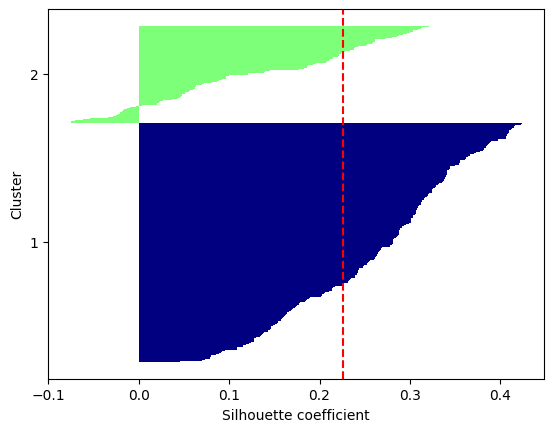

In [106]:
from matplotlib import cm

# grab cluster labels and length
cluster_labels = np.unique(predictions)
n_clusters = len(cluster_labels)

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    # grab silhouette values for each cluster
    c_silhouette_vals = silhouette_vals[predictions == c]
    c_silhouette_vals.sort()
    # plot y and x axes
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)

    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

# plot average value across clusters
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster');
plt.xlabel('Silhouette coefficient');

Clustering models with a high silhouette coefficient are said to be dense, where samples in the same cluster are similar to each other, and well separated, where samples in different clusters are not very similar to each other.

Our coefficients are on the smaller side indicating samples to be farther apart from one another.

We now try to refine our model by testing different k values and compare their silhouette scores.

k=2, Silhouette Score: 0.2254492571029555
k=3, Silhouette Score: 0.2254492571029555
k=4, Silhouette Score: 0.2254492571029555
k=5, Silhouette Score: 0.2254492571029555
k=6, Silhouette Score: 0.2254492571029555
k=7, Silhouette Score: 0.2254492571029555
k=8, Silhouette Score: 0.2254492571029555
k=9, Silhouette Score: 0.2254492571029555
k=10, Silhouette Score: 0.2254492571029555


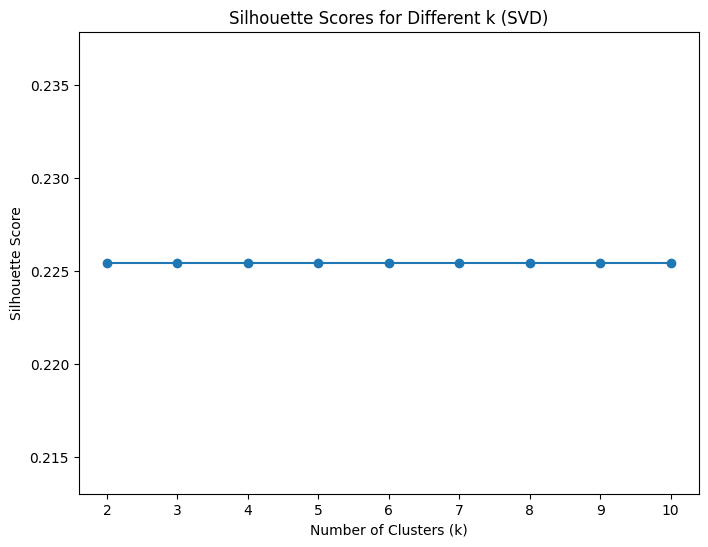

In [94]:
# Test silhouette scores for a range of cluster numbers
scores = []
k_values = range(2, 11)  # Testing k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)
    score = silhouette_score(X, predictions)
    scores.append(score)
    print(f"k={k}, Silhouette Score: {score}")

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, scores, marker='o')
plt.title("Silhouette Scores for Different k (SVD)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


Unfortunately, the SVD results in a silhouette score plot with the same flat trend present on the inital k-means clustering approach. Furthermore the silhouette score was higher.

To address this issue, we try a different clustering method that is better at handling non-spherical cluster shapes: Density-Based Clustering

### Density-Based Clustering (DBSCAN)

`` the good news:``
- good at identifying clusters of all sort of shapes (so not only spherical)
- doesn't necessary assign each point to a cluster (capable of removing noise points)

`` the bad news:``
- the negative effect of the course of dimensionality increases with the number of features in the data
- DBSCAN hyperparameters (MinPts and epsilon) need to be optimized for good clustering results.

The idea is to assign cluster labels based on dense regions of points.

In DBSCAN the notion of density = number of points within a specified radius, $\epsilon$

DBSCAN - concepts:

A spacial label is applied to each data point using these criteria:
   - **core point**: if at least a specified number of neighboring points (MinPts) fall within the specified radius $\epsilon$.
   - **border point**: a point that has fewer neighbors than MinPts within $\epsilon$, but lies within an $\epsilon$ radius of a core point.
   - **noise points**: all other points that are neither core nor border points.

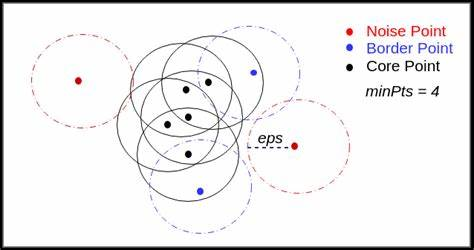

Silhouette score for cluster quality.

In [98]:
from sklearn.metrics import silhouette_score

# Test multiple eps and min_samples values
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 10]
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)

        # Calculate silhouette score if clusters > 1
        if len(set(clusters)) > 1:
            score = silhouette_score(X, clusters)
            results.append((eps, min_samples, score))
        else:
            results.append((eps, min_samples, None))

# Display results
results_df = pd.DataFrame(results, columns=["eps", "min_samples", "silhouette_score"])
print("DBSCAN Parameter Tuning Results:")
print(results_df)

DBSCAN Parameter Tuning Results:
   eps  min_samples  silhouette_score
0  0.3            3         -0.286698
1  0.3            5               NaN
2  0.3           10               NaN
3  0.5            3         -0.374375
4  0.5            5               NaN
5  0.5           10               NaN
6  0.7            3         -0.221158
7  0.7            5         -0.284785
8  0.7           10               NaN


The best model appears to be with 0.7 eps and 3 minimum samples.

In [111]:
# optimal DBSCAN parameters
dbscan = DBSCAN(eps=0.7, min_samples=3)
clusters = dbscan.fit_predict(X)

In [112]:
# Evaluate silhouette score (only if clusters > 1)
if len(set(clusters)) > 1:
    silhouette = silhouette_score(X, clusters)
    print(f"Silhouette Score: {silhouette:.3f}")
else:
    print("Silhouette score not available (only 1 cluster detected).")

Silhouette Score: -0.221


Cluster distribution.

In [113]:
# Convert cluster labels to DataFrame
cluster_counts = pd.DataFrame(clusters, columns=["Cluster"]).value_counts()
print("Cluster Distribution:\n", cluster_counts)


Cluster Distribution:
 Cluster
-1         169
 0          43
 4          17
 1          12
 5           9
 6           7
 7           6
 9           5
 10          5
 11          5
 8           4
 12          4
 14          4
 2           3
 3           3
 13          3
Name: count, dtype: int64


Visualization of the clusters using PCA.

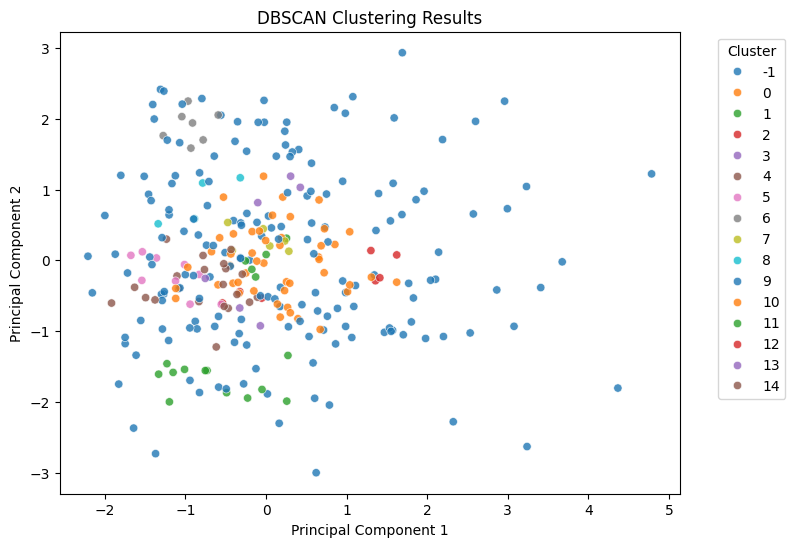

In [114]:
from sklearn.decomposition import PCA

# Perform PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

# Add cluster labels
df_visual = pd.DataFrame(reduced_data, columns=["PCA1", "PCA2"])
df_visual["Cluster"] = clusters

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_visual, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", alpha=0.8)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The density based approach defines 14 clusters.

As an alternative we try using agglomerative clustering.

### Agglomerative Clustering

`` the good news:``
- no need to specify the number of clusters upfront!
- allows us to plot dendrograms (visualizations of a binary hierarchical clustering)


`` the bad news:``
- the negative effect of the course of dimensionality increases with the number of features in the data

The idea behind agglomerative clusteting is to start with each example in X as an individual cluster and merge the closest pairs of clusters until only one cluster remains.

We can use two types of algorithms for agglomerative hierarchical clustering:
- single linkage
- complete linkage

In single linkage, we compute the distances between the most similar members for each pair of clusters and merge the two clusters for which the distance between the most similar members is smallest.

In complete linkage, instead of comparing the most similar members, we compare the most disimilar members to perform the merge.

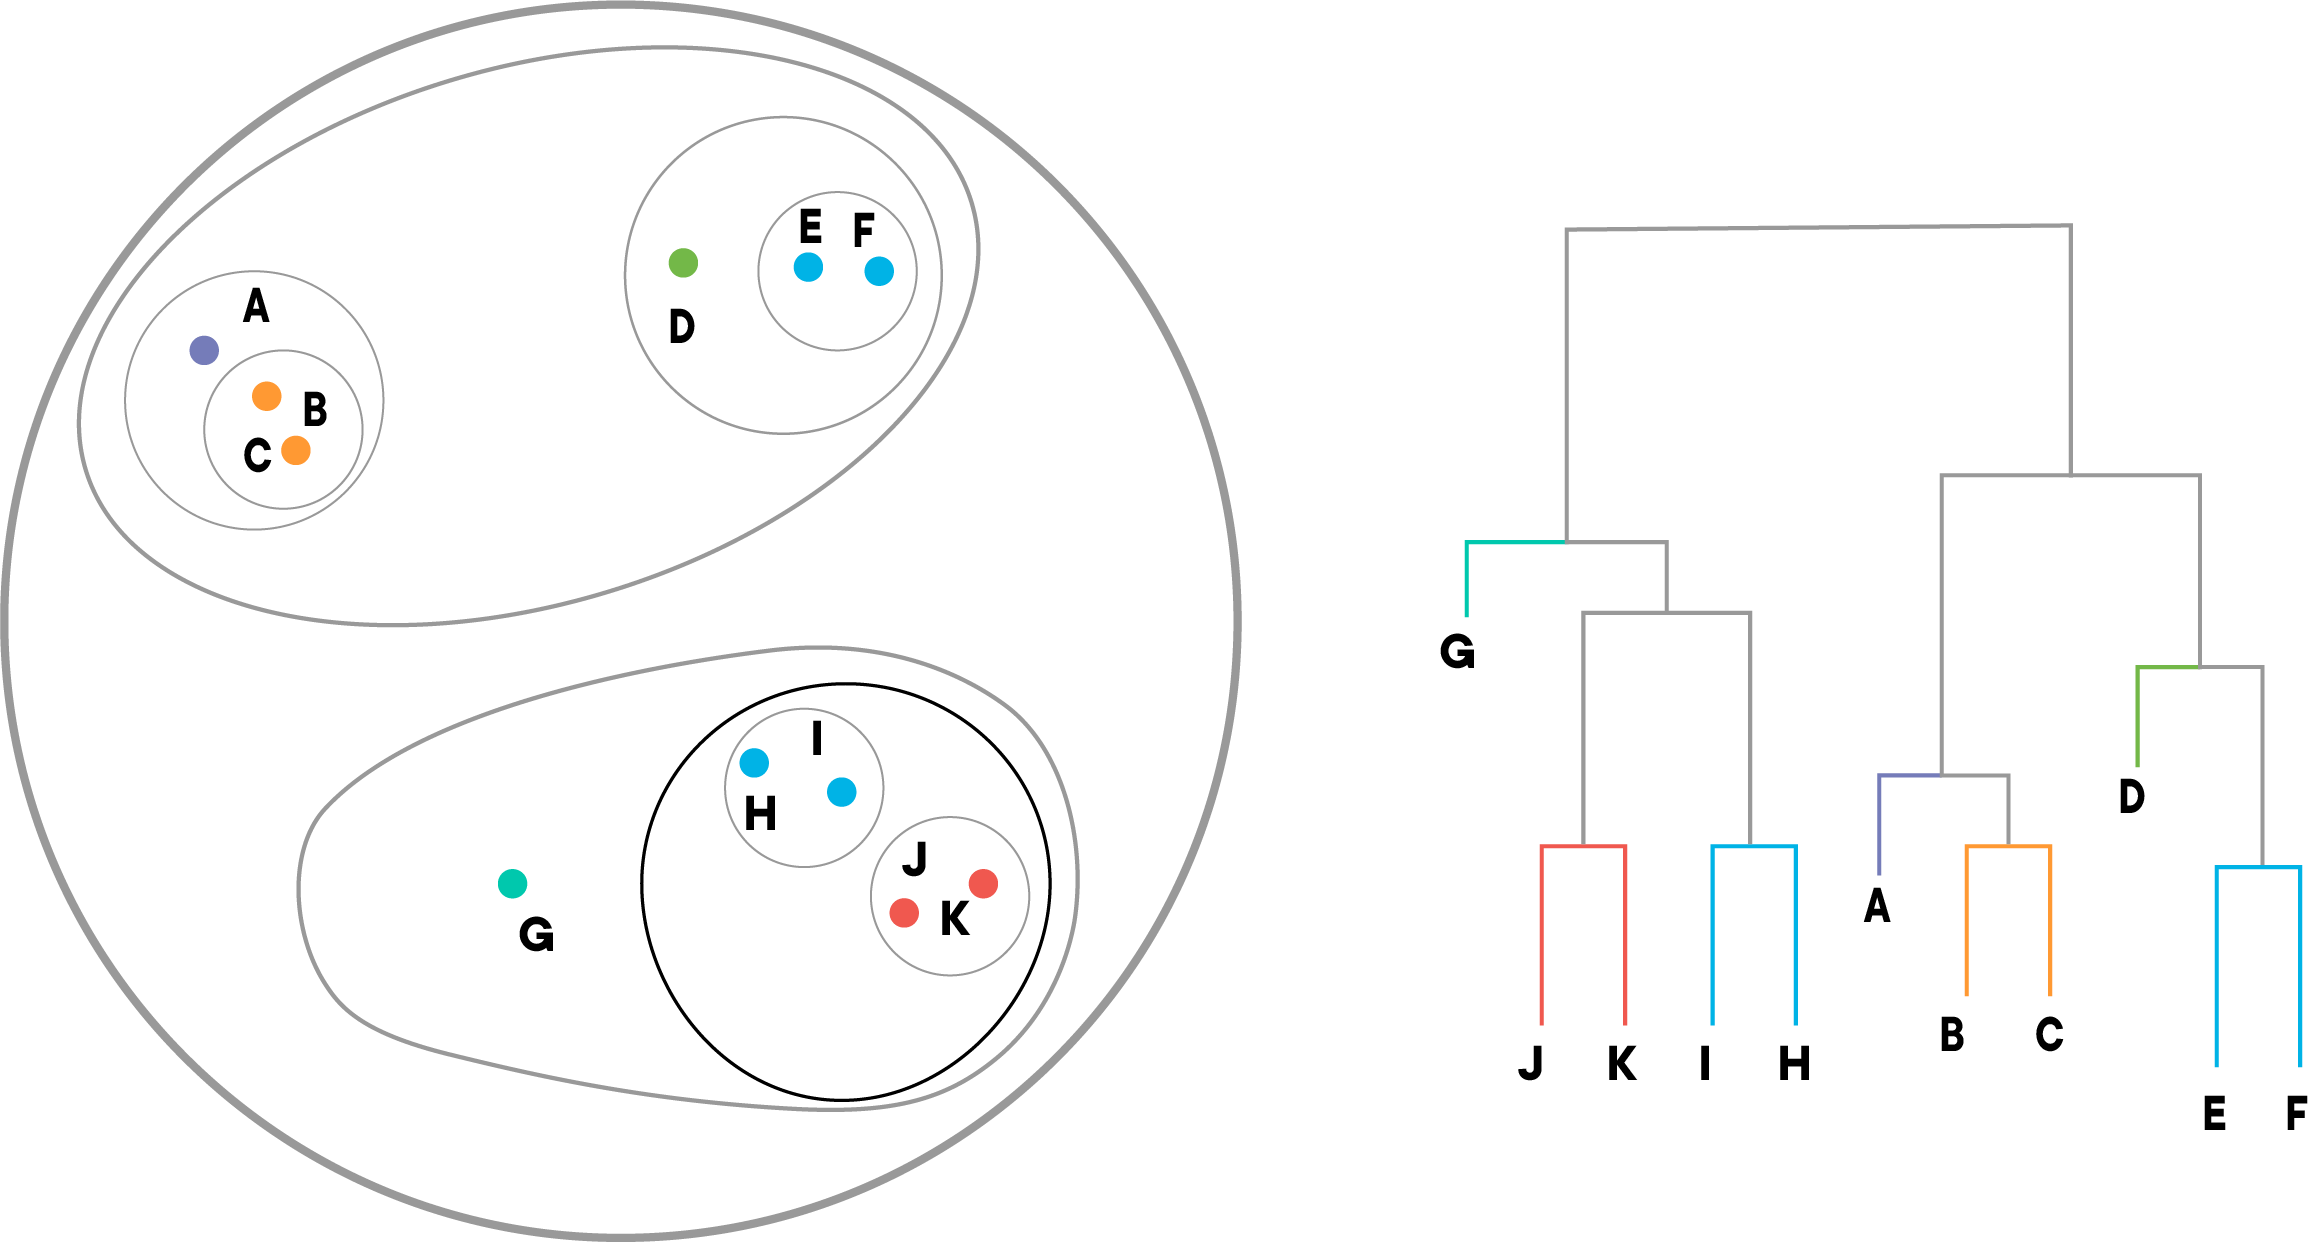

Complete linkage - algorithm steps:
- (1) Compute the distance matrix of all examples.
- (2) Represent each data point as a singleton cluster.
- (3) Merge the two closest clusters based on the distance between the most disimilar (distant) members.
- (4) Update the similarity matrix.
- (5) Repeat steps (2-4) until one cluster remains.

Let's start by computing the distance matrix for all examples. We will only keep the first 5 observations in X for visualization purposes.

In [121]:
from scipy.spatial.distance import pdist, squareform

# transform X to df
agg_df = pd.DataFrame(X)

# Dynamically generate labels based on the number of columns
labels = [f"ID_{i}" for i in range(agg_df.shape[0])]

# calculate the distance between each pair of examples using pdist() from scipy's spatial.distance module
# for visualization: create a symmetrical matrix of pair-wise distances using squareform() from scipy's spatial.distance module
row_dist = pd.DataFrame(squareform(pdist(agg_df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,...,ID_289,ID_290,ID_291,ID_292,ID_293,ID_294,ID_295,ID_296,ID_297,ID_298
ID_0,0.000000,3.659128,1.654522,2.483013,3.630008,3.247813,2.051989,3.915637,4.528717,3.659442,...,4.062624,4.938498,2.631110,3.663570,3.246931,4.093627,3.343843,5.137179,3.664080,3.222596
ID_1,3.659128,0.000000,4.158613,4.143339,6.204766,5.787243,4.071221,3.741503,4.350164,6.586938,...,4.436435,3.094690,2.867283,3.441794,4.139066,4.648365,1.405328,2.608586,1.338608,3.343025
ID_2,1.654522,4.158613,0.000000,1.088301,3.423902,3.319077,1.982213,3.644909,4.354111,4.346069,...,4.369752,4.550727,2.344142,2.965970,2.438704,3.423668,3.471757,5.022707,3.704735,2.579483
ID_3,2.483013,4.143339,1.088301,0.000000,4.349511,3.602282,1.892610,3.509738,4.064229,5.153949,...,4.032740,3.949763,1.900158,2.204523,1.806491,2.659573,3.201962,4.641390,3.419234,2.191322
ID_4,3.630008,6.204766,3.423902,4.349511,0.000000,4.825886,5.183118,5.251821,6.264175,3.919025,...,7.276912,6.980802,5.347374,5.925135,5.352548,6.456481,6.010548,7.040936,6.156203,4.939420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_294,4.093627,4.648365,3.423668,2.659573,6.456481,3.535798,2.849531,3.170164,3.322545,5.918693,...,2.802665,3.247334,2.048443,1.540503,1.236723,0.000000,3.490250,4.249761,3.604934,2.359136
ID_295,3.343843,1.405328,3.471757,3.201962,6.010548,4.985436,3.264915,3.083637,3.296057,6.251546,...,3.474840,2.149886,1.711044,2.344962,3.130368,3.490250,0.000000,2.241409,1.128152,2.372356
ID_296,5.137179,2.608586,5.022707,4.641390,7.040936,6.070450,5.192792,2.794839,3.255536,7.363634,...,4.812166,1.262079,3.209200,3.058985,4.012879,4.249761,2.241409,0.000000,2.110069,2.859313
ID_297,3.664080,1.338608,3.704735,3.419234,6.156203,5.374295,3.643214,3.055971,3.921058,6.594999,...,4.084461,2.214710,2.131024,2.272043,3.113932,3.604934,1.128152,2.110069,0.000000,2.454713


Let's now apply the complete linkage algorithm to our clusters (using the scipy.cluster.hierarchy module)

In [122]:
row_clusters = linkage(pdist(agg_df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,140.0,165.0,0.203942,2.0
cluster 2,45.0,244.0,0.212096,2.0
cluster 3,154.0,291.0,0.241641,2.0
cluster 4,12.0,278.0,0.295449,2.0
cluster 5,21.0,231.0,0.296886,2.0
...,...,...,...,...
cluster 294,582.0,590.0,5.323617,196.0
cluster 295,570.0,589.0,5.879395,77.0
cluster 296,592.0,593.0,6.164869,273.0
cluster 297,587.0,591.0,6.567970,26.0


In this matrix, each row represents one merge.  The first and second column denote the most disimilar members (useful for step (3)). The third column represents the distance between those members.

Finally let's plot the dendrograms using the scipy.cluster.hierarchy module

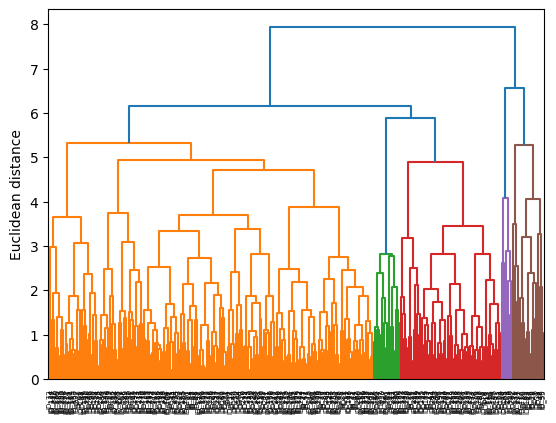

In [123]:
row_dendr = dendrogram(row_clusters,
                       labels=labels,
                       )
plt.ylabel('Euclidean distance');

Developing Model

Test different k-values

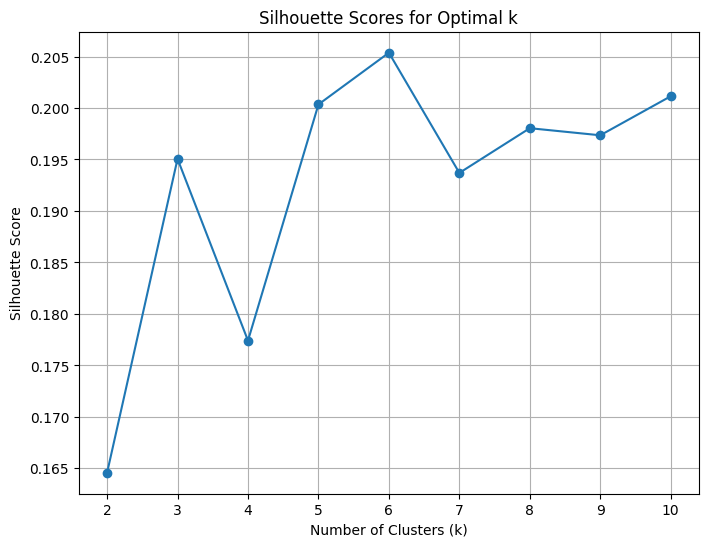

In [129]:
# Test k values
silhouette_scores = []

for k in range(2, 11):  # Silhouette is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

The k-value of 6 seems optimal as it has the highest silhouette score thus indicating better clustering.

In [130]:
from sklearn.cluster import AgglomerativeClustering
k = 6
agglomerative = AgglomerativeClustering(n_clusters=k)
labels = agglomerative.fit_predict(X)

Visualizing the model using PCA to reduce dimensionality.

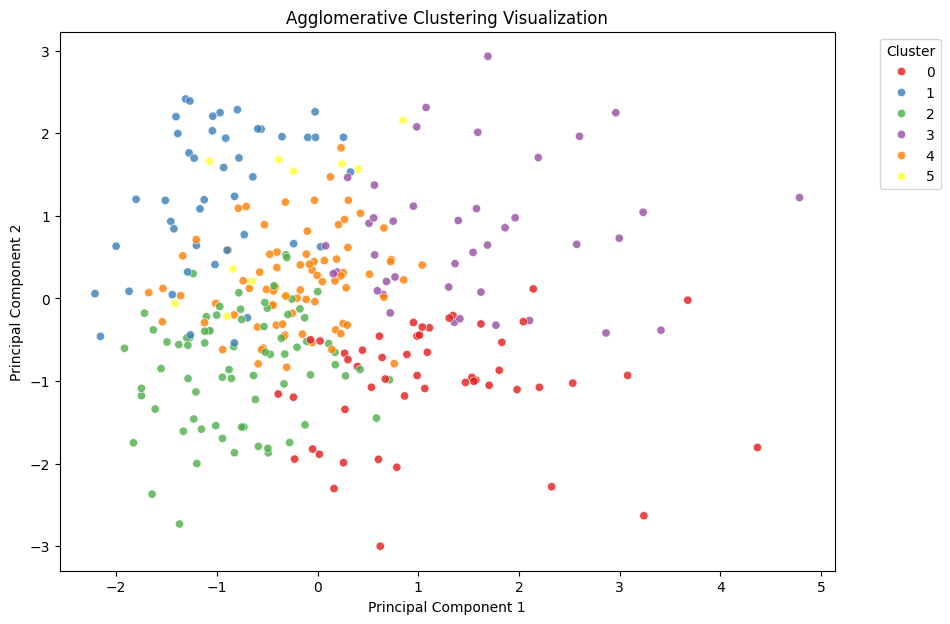

In [131]:
# Perform PCA to reduce the dataset to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

# Create a DataFrame for visualization
visual_df = pd.DataFrame(reduced_data, columns=["PCA1", "PCA2"])
visual_df["Cluster"] = labels

# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=visual_df, x="PCA1", y="PCA2", hue="Cluster", palette="Set1", alpha=0.8)
plt.title("Agglomerative Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

3D Visualization

In [132]:
import plotly.express as px

# Perform PCA to reduce to 3D
pca = PCA(n_components=3)
reduced_data_3d = pca.fit_transform(X)

# Create a DataFrame for visualization
import pandas as pd
visual_df = pd.DataFrame(reduced_data_3d, columns=["PCA1", "PCA2", "PCA3"])
visual_df["Cluster"] = labels

# Interactive 3D scatter plot
fig = px.scatter_3d(
    visual_df,
    x="PCA1",
    y="PCA2",
    z="PCA3",
    color="Cluster",
    title="Interactive 3D Agglomerative Clustering Visualization",
    labels={"Cluster": "Cluster"},
    opacity=0.8
)

# Update layout for better visualization
fig.update_traces(marker=dict(size=5))
fig.update_layout(legend=dict(title="Cluster"), scene=dict(
    xaxis_title="Principal Component 1",
    yaxis_title="Principal Component 2",
    zaxis_title="Principal Component 3"
))

# Show the plot
fig.show()

# Archive

We'll be trying two different methods:
1. The Gavish-Donoho Method
  - The Gavish-Donoho method is a statistical technique used to estimate the optimal rank of a matrix. This rank corresponds to the number of significant components that effectively capture the structure of the data while filtering out noise.
  - The Gavish-Donoho method analyzes the singular values of the matrix (from Singular Value Decomposition) and uses a threshold to distinguish between signal and noise.  
  - The method assumes the observed data matrix is the sum of a **low-rank signal matrix** and **random noise**, and it leverages the **Marchenko-Pastur distribution** to identify the cutoff.

2. Manual Determination using Log of Singular Values Plot

We'll begin with the Gavish Donoho method to determine the rank of the truncated matrix.The assumptions of this method are:
- The observed matrix is assumed to be the sum of a low-rank signal matrix and a noise matrix.
- The noise is typically assumed to follow a random Gaussian distribution.
- Noise in the data is isotropic (same variance across all dimensions).
- The method assumes that singular values of the noise follow the Marchenko-Pastur distribution, which describes the distribution of eigenvalues of random Gaussian matrices.

We now move onto detemine if these assumptions are met.

[Gavish-Donoho Paper](https://arxiv.org/abs/1305.5870)

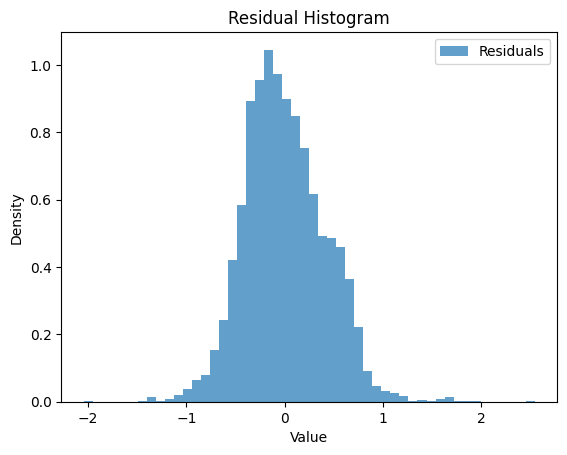

Shapiro-Wilk Test Statistic: 0.9877540953165087 p-value: 1.2533609772257453e-16
Residuals are not Gaussian.


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest

# Perform SVD
U, S, Vt = np.linalg.svd(all_clean.values, full_matrices=False)
k = 5  # Number of components to retain
reconstructed = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k]))
residuals = all_clean.values - reconstructed

# Check residual distribution
plt.hist(residuals.flatten(), bins=50, density=True, alpha=0.7, label='Residuals')
plt.title('Residual Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Test for Gaussianity
stat, p = shapiro(residuals.flatten())
print("Shapiro-Wilk Test Statistic:", stat, "p-value:", p)
if p > 0.05:
    print("Residuals are likely Gaussian.")
else:
    print("Residuals are not Gaussian.")


## Using the Target Variable in Correlation Matrix

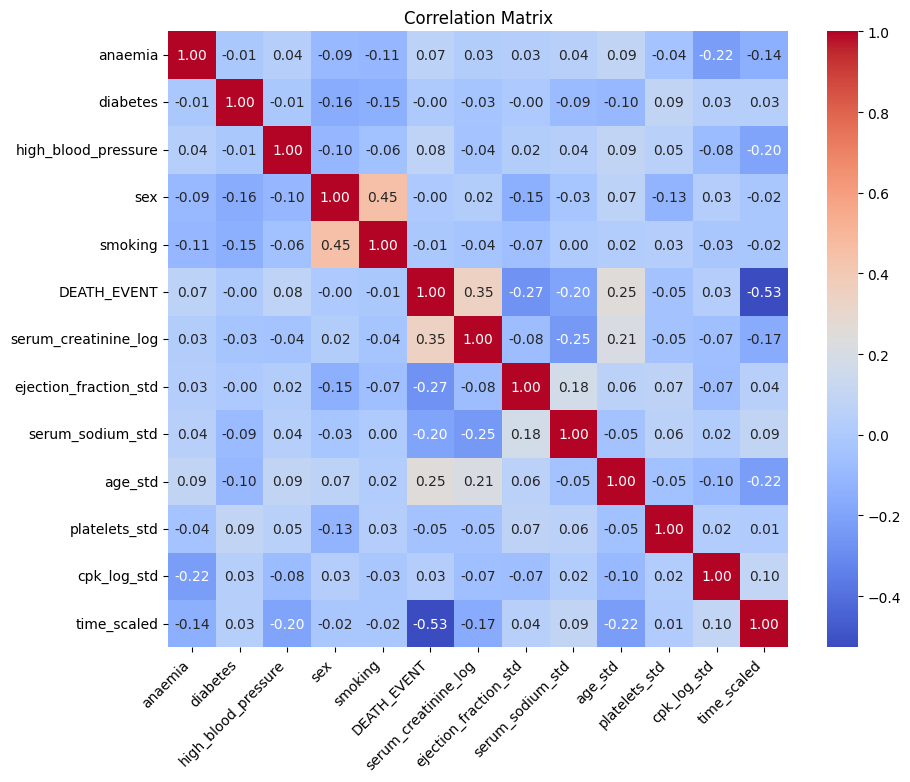

In [75]:
# Correlation matrix for numerical features
# use
correlation_matrix = complete_df.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.xticks(rotation=45, ha='right')    # tilt the x-axis labels for legibility
plt.title("Correlation Matrix")
plt.show()

By examining the correlation matrix, we uncover valuable insights into the relationships between variables in our dataset. As 'DEATH_EVENTS' is the target variable, we'll be focusing on its relationships.

 One of the most significant findings is the strong negative correlation between `time` and `DEATH_EVENT`. This indicates that as the follow-up period (`time`) increases, the likelihood of a death event decreases. In simpler terms, patients who are observed for longer periods tend to have a lower chance of experiencing a death event during the study. This highlights `time` as a crucial feature in predicting patient survival outcomes. `age`, `ejection_fraction`, `serum_creatine`, and `serum_sodium` display prevalent effects on the target variable.

We show all feature correlations to `DEATH_EVENT` in a tabular format below:

In [76]:
# Display all the correlations sorted by magnitude
# Target Variable
target_variable = 'DEATH_EVENT'
sorted_correlations = correlation_matrix[target_variable].sort_values(key = abs, ascending=False)

# Display sorted correlations
print(f"Sorted Correlations with '{target_variable}':")
print(sorted_correlations)


Sorted Correlations with 'DEATH_EVENT':
DEATH_EVENT              1.000000
time_scaled             -0.526964
serum_creatinine_log     0.346136
ejection_fraction_std   -0.268603
age_std                  0.253729
serum_sodium_std        -0.195204
high_blood_pressure      0.079351
anaemia                  0.066270
platelets_std           -0.049139
cpk_log_std              0.032048
smoking                 -0.012623
sex                     -0.004316
diabetes                -0.001943
Name: DEATH_EVENT, dtype: float64


From the correlation analysis, the following variables exhibit weak relationships with the target variable (`death_event`):  

| **Weak Variable**     | **Correlation**|
|-----------------------|-----------|
| `high_blood_pressure`   |   0.079351|
| `anaemia`               |   0.066270|
|`platelets_std`          |  -0.049139|
| `cpk_log_std`           |   0.032048|
| `smoking`               |  -0.012623|
| `sex`                   |  -0.004316|
| `diabetes`              |  -0.001943|

We can start considering eliminating these variables, but, we'll do some more analyses later on to get some more backing before we write them off. The visualizations continue.

We start by visualizing the variables with the highest impact on `death_event` as depicted by the heatmaps:

- `time`
-`serum_creatine`
-`ejection_fraction`
-`age`
-`serum_sodium`

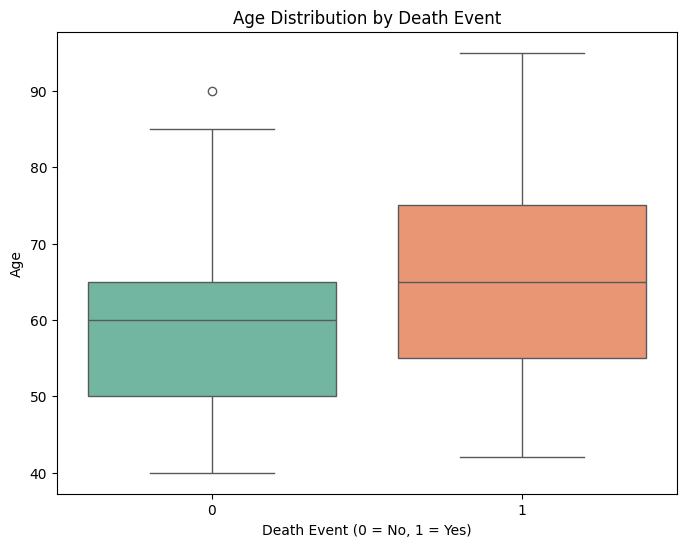

In [19]:
# Boxplot for age vs. death_event
plt.figure(figsize=(8, 6))
sns.boxplot(y='age', x='DEATH_EVENT', data=df, hue='DEATH_EVENT', dodge=False, palette='Set2', legend=False)
plt.title('Age Distribution by Death Event')
plt.xlabel('Death Event (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

<ipython-input-40-2485fb224602>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='anaemia', y='DEATH_EVENT', ci=None, palette='Set2')
<ipython-input-40-2485fb224602>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='anaemia', y='DEATH_EVENT', ci=None, palette='Set2')


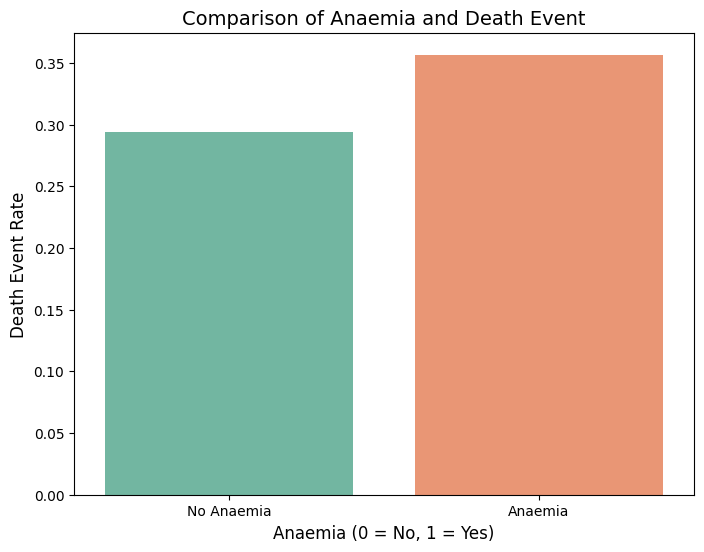

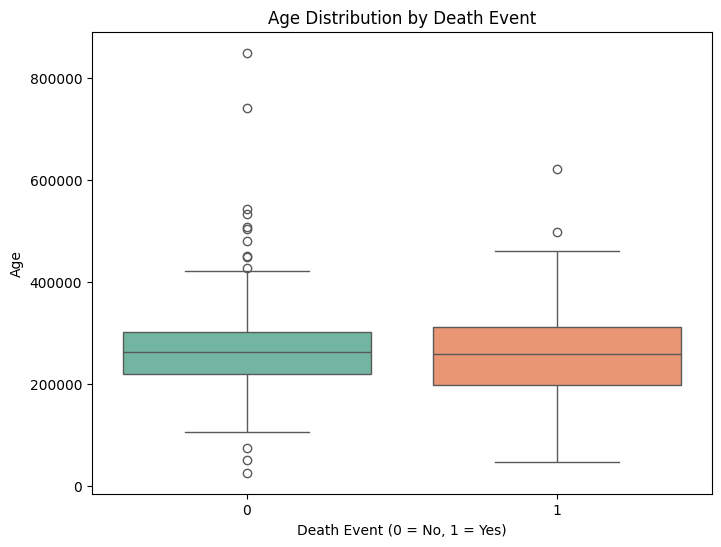

In [40]:
# Create a bar plot comparing anaemia and death_event
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='anaemia', y='DEATH_EVENT', ci=None, palette='Set2')

# Add labels and title
plt.title("Comparison of Anaemia and Death Event", fontsize=14)
plt.xlabel("Anaemia (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Death Event Rate", fontsize=12)
plt.xticks([0, 1], ['No Anaemia', 'Anaemia'], fontsize=10)
plt.show()

# Boxplot for age vs. death_event
plt.figure(figsize=(8, 6))
sns.boxplot(y='platelets', x='DEATH_EVENT', data=df, hue='DEATH_EVENT', dodge=False, palette='Set2', legend=False)
plt.title('Age Distribution by Death Event')
plt.xlabel('Death Event (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

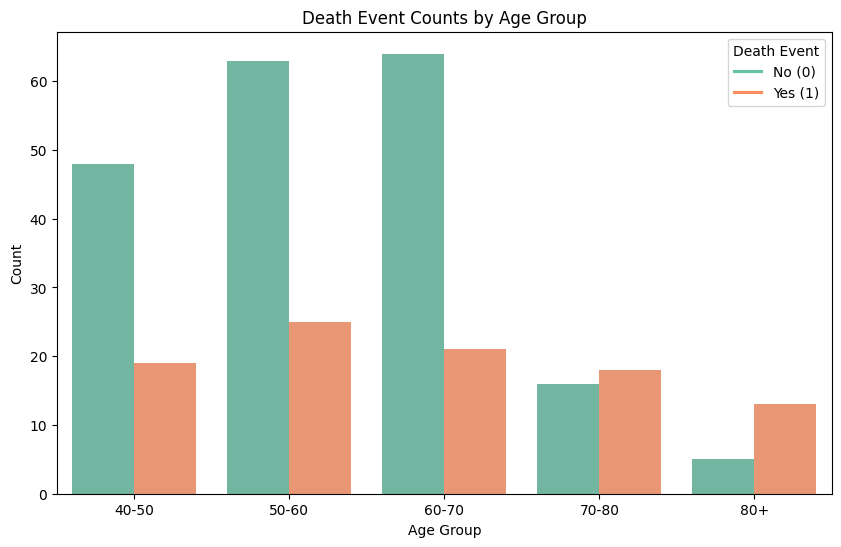

In [26]:
# Create age bins
df['age_group'] = pd.cut(df['age'], bins=[40, 50, 60, 70, 80, 100],
                         labels=['40-50', '50-60', '60-70', '70-80', '80+'])

# grouping age by bins
age_death_counts = df.groupby(['age_group', 'DEATH_EVENT'], observed=False).size().reset_index(name='count')

# Adjust palette to match the number of unique hue values
palette = sns.color_palette("Set2", n_colors=len(age_death_counts['DEATH_EVENT'].unique()))

plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='count', hue='DEATH_EVENT', data=age_death_counts, palette=palette)
plt.title('Death Event Counts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Adjust legend to reflect the color palette
legend = plt.legend(title='Death Event', labels=['No (0)', 'Yes (1)'])
for handle, color in zip(legend.legend_handles, palette):
    handle.set_color(color)

plt.show()

The boxplots and bar graphs show a significant difference in the death event when considering age as well as approximately normal distributions in the data for each event. For good measure we'll use a statistical test to determine statistical significance in the average age of each death event.

To perform this test we'll use a t-test of sorts as we can pretty safely assume normality. Independence wasn't explicitly stated in the data collection notes nor do we have any idea on how samples were collected. However, as each patient can only be classified as dead or alive and only contributes to one entry, there weren't overlaps. As such, we'll move forward with the assumption of independence.

Now we'll move onto selecting a t-test based off the variance of each group. Should they be significantly different we use Welch's t-test, else we proceed with the classic student's t-test.

In [28]:
from scipy.stats import levene

# Define groups to tesr
group_0 = df[df['DEATH_EVENT'] == 0]['age']
group_1 = df[df['DEATH_EVENT'] == 1]['age']

# Levene's test for equality of variances
stat, p = levene(group_0, group_1)
print(f"Levene's test statistic: {stat:.4f}, P-value: {p:.4f}")
if p < 0.05:
    print("Variances are significantly different. Use Welch's t-test.")
else:
    print("Variances are equal. You may proceed with the classic t-test.")

Levene's test statistic: 7.1338, P-value: 0.0080
Variances are significantly different. Use Welch's t-test.


As the variances are significantly different we use Welch's t-test.

In [29]:
from scipy.stats import ttest_ind

# Perform Welch's t-test
t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)

# Display results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("The mean age is significantly different between the two groups.")
else:
    print("There is no significant difference in the mean age between the two groups.")


T-statistic: -4.1862
P-value: 0.0000
The mean age is significantly different between the two groups.


The t-test reveals a statistically significance between the mean ages of the two groups. We now know age is an important variable in modeling patient survival.